In [ ]:
#Preparamos los datos y lo divimos en train/ test

In [5]:
#cargamos librerias

import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns

In [6]:
data = pd.read_csv(".//airbnb-listings-extract.csv", delimiter=";") # cargamos fichero
print(data.shape)
data.head(5).T 

(14780, 89)


0  \
ID                                                                       11210388   
Listing Url                                 https://www.airbnb.com/rooms/11210388   
Scrape ID                                                          20170306202425   
Last Scraped                                                           2017-03-07   
Name                                               The Loft-Full Bath-Deck w/View   
...                                                                           ...   
Cancellation Policy                                                      moderate   
Calculated host listings count                                                1.0   
Reviews per Month                                                             3.5   
Geolocation                                          30.3373609355,-97.8632766782   
Features                        Host Is Superhost,Host Has Profile Pic,Host Id...   

                                                                                1  \
ID                                                                       17471131   
Listing Url                                 https://www.airbnb.com/rooms/17471131   
Scrape ID                                                          20170407214050   
Last Scraped                                                           2017-04-08   
Name                                                   Claris I, Friendly Rentals   
...                                                                           ...   
Cancellation Policy                                               super_strict_30   
Calculated host listings count                                              106.0   
Reviews per Month                                                            0.86   
Geolocation                                           41.3896829422,2.17262543017   
Features                        Host Has Profile Pic,Requires License,Instant ...   

                                                                                2  \
ID                                                                       17584891   
Listing Url                                 https://www.airbnb.com/rooms/17584891   
Scrape ID                                                          20170407214050   
Last Scraped                                                           2017-04-08   
Name                                          Style Terrace Red, Friendly Rentals   
...                                                                           ...   
Cancellation Policy                                               super_strict_30   
Calculated host listings count                                              106.0   
Reviews per Month                                                             NaN   
Geolocation                                           41.3930345489,2.16217327868   
Features                        Host Has Profile Pic,Requires License,Instant ...   

                                                                                3  \
ID                                                                        5398030   
Listing Url                                  https://www.airbnb.com/rooms/5398030   
Scrape ID                                                          20170407214050   
Last Scraped                                                           2017-04-08   
Name                                            Picasso Suite 1.4 Paseo de Gracia   
...                                                                           ...   
Cancellation Policy                                                        strict   
Calculated host listings count                                               24.0   
Reviews per Month                                                            1.09   
Geolocation                                            41.3969668101,2.1674178103   
Features                        Host Has Profile Pic,Host Identity Verified,Re... 

In [22]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv("./airbnb-listings-extract.csv", delimiter=";")
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')
print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv("./airbnb-listings-extract_train.csv", sep=";",decimal='.', index=False)
test.to_csv("./airbnb-listings-extract_test.csv", sep=";",decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos solo  con él. 

data = pd.read_csv('./airbnb-listings-extract_train.csv', sep=';', decimal='.')
data.head(5).T

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)
Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


0  \
ID                                                                        5994463   
Listing Url                                  https://www.airbnb.com/rooms/5994463   
Scrape ID                                                          20170407214119   
Last Scraped                                                           2017-04-08   
Name                                             PISO ATOCHA- FLAT NEAR ATOCHA  .   
...                                                                           ...   
Cancellation Policy                                                      moderate   
Calculated host listings count                                                2.0   
Reviews per Month                                                             0.5   
Geolocation                                          40.4077318793,-3.68481869733   
Features                        Host Has Profile Pic,Is Location Exact,Require...   

                                                                                1  \
ID                                                                       14136180   
Listing Url                                 https://www.airbnb.com/rooms/14136180   
Scrape ID                                                          20170407214119   
Last Scraped                                                           2017-04-08   
Name                                                       The Palace Sol Madrid.   
...                                                                           ...   
Cancellation Policy                                                      flexible   
Calculated host listings count                                                1.0   
Reviews per Month                                                            2.43   
Geolocation                                          40.4158022422,-3.70534037765   
Features                        Host Has Profile Pic,Host Identity Verified,Re...   

                                                                                2  \
ID                                                                       15520134   
Listing Url                                 https://www.airbnb.com/rooms/15520134   
Scrape ID                                                          20170407214119   
Last Scraped                                                           2017-04-08   
Name                               por persona la noche metro linea5 vista alegre   
...                                                                           ...   
Cancellation Policy                                                      moderate   
Calculated host listings count                                               16.0   
Reviews per Month                                                             NaN   
Geolocation                                          40.3890481626,-3.74037392557   
Features                        Host Has Profile Pic,Host Identity Verified,Is...   

                                                                    3  \
ID                                                            8809721   
Listing Url                      https://www.airbnb.com/rooms/8809721   
Scrape ID                                              20170407214119   
Last Scraped                                               2017-04-08   
Name                              CITY CENTER JACINTO BENAVENTE ROOM4   
...                                                               ...   
Cancellation Policy                                            strict   
Calculated host listings count                                   97.0   
Reviews per Month                                                 NaN   
Geolocation                              40.4128140929,-3.70305247638   
Features                        Host Has Profile Pic,Requires License   

                                                                                4  
ID                                                      

In [23]:
data.shape

(11824, 89)

In [24]:
#ver las primeras filas del datrame 
print(data.head())

         ID                            Listing Url       Scrape ID  \
0   5994463   https://www.airbnb.com/rooms/5994463  20170407214119   
1  14136180  https://www.airbnb.com/rooms/14136180  20170407214119   
2  15520134  https://www.airbnb.com/rooms/15520134  20170407214119   
3   8809721   https://www.airbnb.com/rooms/8809721  20170407214119   
4   1162707   https://www.airbnb.com/rooms/1162707  20170407214119   

  Last Scraped                                            Name  \
0   2017-04-08                PISO ATOCHA- FLAT NEAR ATOCHA  .   
1   2017-04-08                          The Palace Sol Madrid.   
2   2017-04-08  por persona la noche metro linea5 vista alegre   
3   2017-04-08             CITY CENTER JACINTO BENAVENTE ROOM4   
4   2017-04-08              NICE & BIG DOUBLE ROOM AT DOWNTOWN   

                                             Summary  \
0  Piso recién reformado cómoda habitación con ba...   
1  Lugares de interés: Plaza Mayor, Plaza del Sol...   
2  我的房源靠近餐厅和餐饮

In [25]:
#resumen estadistico de las columnas númericas 
print(data.describe())

                 ID     Scrape ID       Host ID  Host Response Rate  \
count  1.182400e+04  1.182400e+04  1.182400e+04        10317.000000   
mean   1.025308e+07  2.017038e+13  3.588310e+07           94.803722   
std    5.566485e+06  5.505346e+08  3.411993e+07           15.247078   
min    1.986400e+04  2.016010e+13  1.745300e+04            0.000000   
25%    5.510692e+06  2.017041e+13  6.855490e+06          100.000000   
50%    1.125754e+07  2.017041e+13  2.454770e+07          100.000000   
75%    1.531982e+07  2.017041e+13  5.431096e+07          100.000000   
max    1.858361e+07  2.017062e+13  1.247534e+08          100.000000   

       Host Listings Count  Host Total Listings Count      Latitude  \
count         11821.000000               11821.000000  11824.000000   
mean             12.754420                  12.754420     40.491628   
std              34.578895                  34.578895      4.701030   
min               0.000000                   0.000000    -37.851182   
25%  

In [26]:
data.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object

In [32]:
# Convierto las columnas de fecha
data['Last Scraped'] = pd.to_datetime(data['Last Scraped'])
data['Host Since'] = pd.to_datetime(data['Host Since'])


In [34]:
data.dtypes

ID                                         int64
Listing Url                               object
Scrape ID                                  int64
Last Scraped                      datetime64[ns]
Name                                      object
                                       ...      
Cancellation Policy                       object
Calculated host listings count           float64
Reviews per Month                        float64
Geolocation                               object
Features                                  object
Length: 89, dtype: object

In [36]:
#identifico y elimino las variables con un salo valor único,
#ya que estas variables no me aportan información útil para el modelo

In [38]:
# Identificar columnas con un único valor
unique_columns = data.columns[data.nunique() == 1]

# Verificar si hay columnas con un único valor
print("Columnas con un único valor:", unique_columns)

# Paso 2: Eliminar las columnas con un único valor
data = data.drop(columns=unique_columns)  

# Paso 3: Verificar que las columnas hayan sido eliminadas
print(f"Se han eliminado {len(unique_columns)} columnas con un único valor.")

# Comprobar que las columnas se han eliminado correctamente
print("Dimensiones del dataframe después de la eliminación:", data.shape)
print("Primeras filas del dataframe después de la eliminación:\n", data.head())


Columnas con un único valor: Index(['Has Availability'], dtype='object')
Se han eliminado 1 columnas con un único valor.
Dimensiones del dataframe después de la eliminación: (11824, 88)
Primeras filas del dataframe después de la eliminación:
          ID                            Listing Url       Scrape ID  \
0   5994463   https://www.airbnb.com/rooms/5994463  20170407214119   
1  14136180  https://www.airbnb.com/rooms/14136180  20170407214119   
2  15520134  https://www.airbnb.com/rooms/15520134  20170407214119   
3   8809721   https://www.airbnb.com/rooms/8809721  20170407214119   
4   1162707   https://www.airbnb.com/rooms/1162707  20170407214119   

  Last Scraped                                            Name  \
0   2017-04-08                PISO ATOCHA- FLAT NEAR ATOCHA  .   
1   2017-04-08                          The Palace Sol Madrid.   
2   2017-04-08  por persona la noche metro linea5 vista alegre   
3   2017-04-08             CITY CENTER JACINTO BENAVENTE ROOM4   
4   20

In [40]:
#Identifico columnas con valores nulos
null_counts = data.isnull().sum()

# Veo las columnas con valores nulos
print("Valores nulos por columna:\n", null_counts[null_counts > 0])

# Porcentaje de valores nulos por columna
null_percentage = (null_counts / len(data)) * 100
print("Porcentaje de valores nulos por columna:\n", null_percentage[null_percentage > 0])


Valores nulos por columna:
 Name                                  1
Summary                             469
Space                              3106
Description                           6
Neighborhood Overview              4515
Notes                              7281
Transit                            4581
Access                             5161
Interaction                        5232
House Rules                        4143
Thumbnail Url                      2295
Medium Url                         2295
Picture Url                          18
XL Picture Url                     2295
Host Name                             3
Host Since                            3
Host Location                        34
Host About                         4160
Host Response Time                 1507
Host Response Rate                 1507
Host Acceptance Rate              11794
Host Thumbnail Url                    3
Host Picture Url                      3
Host Neighbourhood                 3082
Host Listing

In [42]:
#elimino las columnas con mas del 90% de valores nulos
high_null_columns = null_percentage[null_percentage > 90].index
data.drop(columns=high_null_columns, inplace=True)

# Compruebo que las columnas han sido eliminadas
print(f"Se han eliminado las siguientes columnas con más del 90% de valores nulos:\n{high_null_columns}")


Se han eliminado las siguientes columnas con más del 90% de valores nulos:
Index(['Host Acceptance Rate', 'Square Feet', 'License', 'Jurisdiction Names'], dtype='object')


In [44]:
#Imputamos los valores nulos , de las columnas restantes, tanto categoricas como numericas
#Las númericas las imputamos con la mediana, porque es más robusta en los valores atípicos
#Las categoricas, con la moda que es el valor más frecuente

In [46]:
# Imputar los valores nulos en columnas numéricas con la mediana
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Comprobar que los nulos en variables numéricas se han imputado
print(data[numeric_columns].isnull().sum())


ID                                0
Scrape ID                         0
Host ID                           0
Host Response Rate                0
Host Listings Count               0
Host Total Listings Count         0
Latitude                          0
Longitude                         0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Price                             0
Weekly Price                      0
Monthly Price                     0
Security Deposit                  0
Cleaning Fee                      0
Guests Included                   0
Extra People                      0
Minimum Nights                    0
Maximum Nights                    0
Availability 30                   0
Availability 60                   0
Availability 90                   0
Availability 365                  0
Number of Reviews                 0
Review Scores Rating              0
Review Scores Accuracy      

In [48]:
# Imputar los valores nulos en columnas categóricas con la moda
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Compruebo que los nulos en variables categóricas se han imputado
print(data[categorical_columns].isnull().sum())


Listing Url                     0
Name                            0
Summary                         0
Space                           0
Description                     0
Experiences Offered             0
Neighborhood Overview           0
Notes                           0
Transit                         0
Access                          0
Interaction                     0
House Rules                     0
Thumbnail Url                   0
Medium Url                      0
Picture Url                     0
XL Picture Url                  0
Host URL                        0
Host Name                       0
Host Location                   0
Host About                      0
Host Response Time              0
Host Thumbnail Url              0
Host Picture Url                0
Host Neighbourhood              0
Host Verifications              0
Street                          0
Neighbourhood                   0
Neighbourhood Cleansed          0
Neighbourhood Group Cleansed    0
City          

In [50]:
#compruebo que no me quedan valores nulos

print("Valores nulos después del tratamiento:\n", data.isnull().sum())


Valores nulos después del tratamiento:
 ID                                0
Listing Url                       0
Scrape ID                         0
Last Scraped                      0
Name                              0
                                 ..
Cancellation Policy               0
Calculated host listings count    0
Reviews per Month                 0
Geolocation                       0
Features                          0
Length: 84, dtype: int64


In [52]:
#Analisis exloratorio
#Primero vamos con las variables numericas

In [54]:
#Identifico las variables númericas
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
print(f"Columnas numéricas: \n{numeric_columns}")


Columnas numéricas: 
Index(['ID', 'Scrape ID', 'Host ID', 'Host Response Rate',
       'Host Listings Count', 'Host Total Listings Count', 'Latitude',
       'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price',
       'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Availability 30', 'Availability 60', 'Availability 90',
       'Availability 365', 'Number of Reviews', 'Review Scores Rating',
       'Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value',
       'Calculated host listings count', 'Reviews per Month'],
      dtype='object')


In [56]:
# Resumen estadístico de variables numéricas
print(data[numeric_columns].describe())


                 ID     Scrape ID       Host ID  Host Response Rate  \
count  1.182400e+04  1.182400e+04  1.182400e+04        11824.000000   
mean   1.025308e+07  2.017038e+13  3.588310e+07           95.466001   
std    5.566485e+06  5.505346e+08  3.411993e+07           14.347284   
min    1.986400e+04  2.016010e+13  1.745300e+04            0.000000   
25%    5.510692e+06  2.017041e+13  6.855490e+06          100.000000   
50%    1.125754e+07  2.017041e+13  2.454770e+07          100.000000   
75%    1.531982e+07  2.017041e+13  5.431096e+07          100.000000   
max    1.858361e+07  2.017062e+13  1.247534e+08          100.000000   

       Host Listings Count  Host Total Listings Count      Latitude  \
count         11824.000000               11824.000000  11824.000000   
mean             12.751691                  12.751691     40.491628   
std              34.574932                  34.574932      4.701030   
min               0.000000                   0.000000    -37.851182   
25%  

In [58]:
'''
Comprobuebo viendo esto:
ID, ScrapeID, Host ID, son identificadores únicos, y no me aporta información útil para el modelo de regresión
Host Response Rate, tiene una media alta(95), y una mediana de 100, lo que indica que la mayoría de los anfitriones 
tienen una alta respuesta y no veo que tenga un gran impacto sobre el precio
Host Acceptance Rate, le pasa lo mismo que el anterior
Host Listings Count y Host Total Count, nos indica las propiedades que gestiona un anfitrión por lo que no debría tener impacto
sobre el precio
License, la elimino, he rellenado muchos valores nulos y además creo que no ayuda a predecir el precio
También me pasa con Jurisdiction Names y Security Deposit
'''

'\nComprobuebo viendo esto:\nID, ScrapeID, Host ID, son identificadores únicos, y no me aporta información útil para el modelo de regresión\nHost Response Rate, tiene una media alta(95), y una mediana de 100, lo que indica que la mayoría de los anfitriones \ntienen una alta respuesta y no veo que tenga un gran impacto sobre el precio\nHost Acceptance Rate, le pasa lo mismo que el anterior\nHost Listings Count y Host Total Count, nos indica las propiedades que gestiona un anfitrión por lo que no debría tener impacto\nsobre el precio\nLicense, la elimino, he rellenado muchos valores nulos y además creo que no ayuda a predecir el precio\nTambién me pasa con Jurisdiction Names y Security Deposit\n'

In [60]:
# Columnas eliminadas por no ser necesarias
columns_to_drop = ['ID', 'Scrape ID', 'Host ID', 'Host Response Rate', 'Host Listings Count', 'Host Total Listings Count', 'Calculated host listings count', 'Reviews per Month']
data = data.drop(columns=columns_to_drop)
print("Columnas eliminadas por no ser necesarias:\n", columns_to_drop)


Columnas eliminadas por no ser necesarias:
 ['ID', 'Scrape ID', 'Host ID', 'Host Response Rate', 'Host Listings Count', 'Host Total Listings Count', 'Calculated host listings count', 'Reviews per Month']


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 76 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Listing Url                   11824 non-null  object        
 1   Last Scraped                  11824 non-null  datetime64[ns]
 2   Name                          11824 non-null  object        
 3   Summary                       11824 non-null  object        
 4   Space                         11824 non-null  object        
 5   Description                   11824 non-null  object        
 6   Experiences Offered           11824 non-null  object        
 7   Neighborhood Overview         11824 non-null  object        
 8   Notes                         11824 non-null  object        
 9   Transit                       11824 non-null  object        
 10  Access                        11824 non-null  object        
 11  Interaction                 

In [64]:
#Vuelvo a identificar las variables numericas que me he quedado por ahora

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
print("Variables numéricas:\n", numeric_columns)

Variables numéricas:
 Index(['Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value'],
      dtype='object')


In [66]:
#hago el resumen estadistico
# Resumen estadístico de variables numéricas
print(data[numeric_columns].describe())


           Latitude     Longitude  Accommodates     Bathrooms      Bedrooms  \
count  11824.000000  11824.000000  11824.000000  11824.000000  11824.000000   
mean      40.491628     -3.776863      3.277486      1.284168      1.343708   
std        4.701030     14.014695      2.093973      0.663680      0.904525   
min      -37.851182   -123.124429      1.000000      0.000000      0.000000   
25%       40.409758     -3.707538      2.000000      1.000000      1.000000   
50%       40.419331     -3.700763      3.000000      1.000000      1.000000   
75%       40.430778     -3.683917      4.000000      1.000000      2.000000   
max       55.966912    153.371427     16.000000      8.000000     10.000000   

               Beds         Price  Weekly Price  Monthly Price  \
count  11824.000000  11824.000000  11824.000000   11824.000000   
mean       2.048968     73.688853    356.928958    1256.387771   
std        1.620949     71.582493     96.892062     617.338147   
min        1.000000     

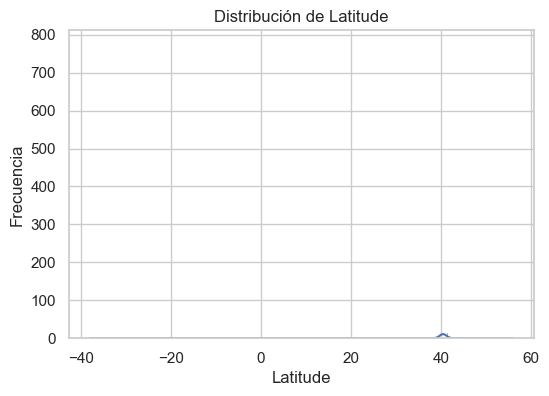

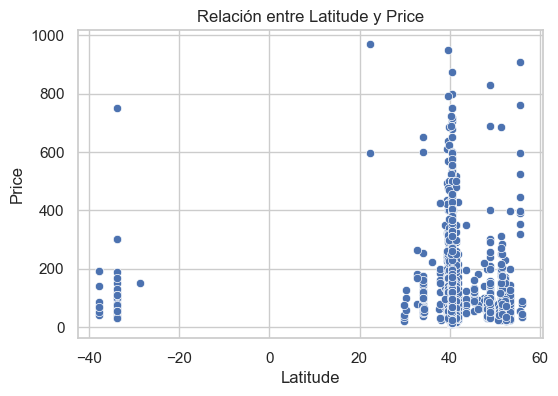

Distribución de Latitude:
Latitude
40.407732    0.000085
40.435350    0.000085
40.431497    0.000085
52.486072    0.000085
41.889325    0.000085
               ...   
40.451928    0.000085
40.398294    0.000085
40.412336    0.000085
40.390106    0.000085
40.431011    0.000085
Name: proportion, Length: 11824, dtype: float64


In [68]:
#Histograma de frecuencua de Latitude
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de las gráficas
sns.set(style="whitegrid")


plt.figure(figsize=(6, 4))
sns.histplot(data['Latitude'], kde=True)
plt.title('Distribución de Latitude')
plt.xlabel('Latitude')
plt.ylabel('Frecuencia')
plt.show()

# Relacion entre Latitude y Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Latitude'], y=data['Price'])
plt.title('Relación entre Latitude y Price')
plt.xlabel('Latitude')
plt.ylabel('Price')
plt.show()

# Distribución de valores en Latitude
print("Distribución de Latitude:")
print(data['Latitude'].value_counts(normalize=True))

In [69]:
#En la latitude, a pesar de los resultados pienso que es importante para calcular el precio 
#dado que dependiendo de la ubicacion del sitio el precio varia
#igual pasaria con la longuitid 

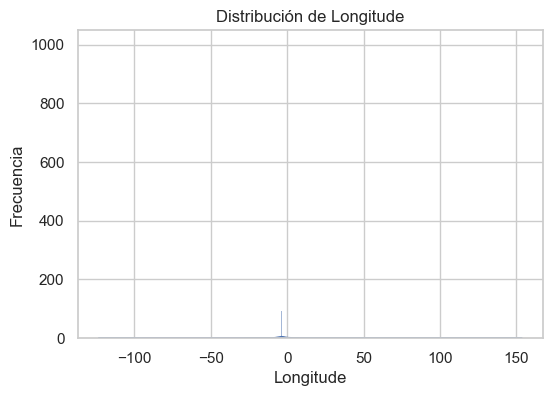

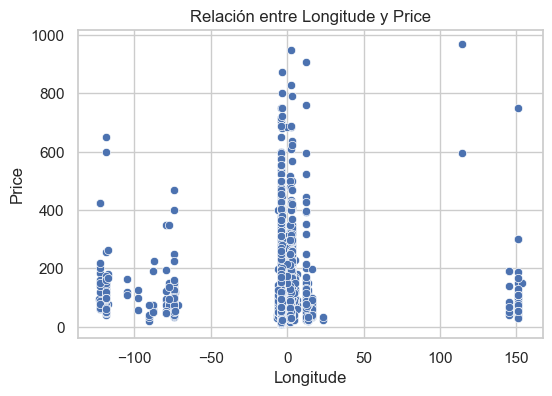

Distribución de Longitude:
Longitude
-3.684819     0.000085
-3.672415     0.000085
-3.717844     0.000085
 13.390524    0.000085
 12.460886    0.000085
                ...   
-3.699014     0.000085
-3.696689     0.000085
-3.704877     0.000085
-3.687223     0.000085
-3.677769     0.000085
Name: proportion, Length: 11824, dtype: float64


In [70]:
# Histograma de frecuencia de Longitude
plt.figure(figsize=(6, 4))
sns.histplot(data['Longitude'], kde=True)
plt.title('Distribución de Longitude')
plt.xlabel('Longitude')
plt.ylabel('Frecuencia')
plt.show()

# Relaciono entre Longitude y Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Longitude'], y=data['Price'])
plt.title('Relación entre Longitude y Price')
plt.xlabel('Longitude')
plt.ylabel('Price')
plt.show()

# Distribución de valores en Longitude
print("Distribución de Longitude:")
print(data['Longitude'].value_counts(normalize=True))

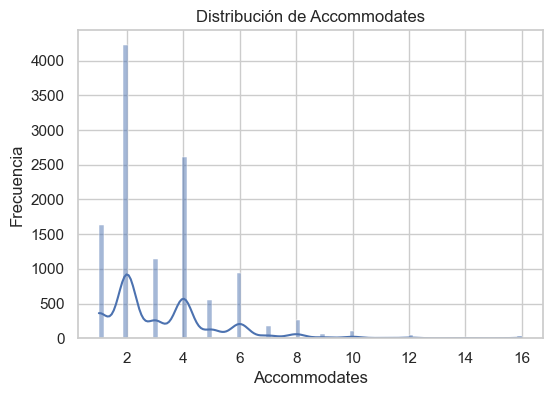

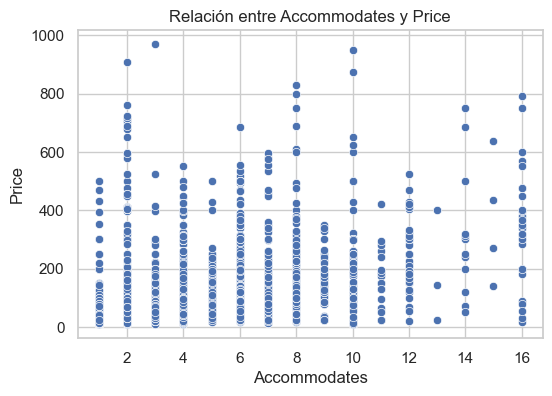

Distribución de Accommodates:
Accommodates
2     4227
4     2614
1     1635
3     1140
6      943
5      554
8      267
7      175
10      98
9       59
12      43
16      31
11      19
14      12
15       4
13       3
Name: count, dtype: int64


In [71]:
# Histograma de frecuencia de Accommodates
plt.figure(figsize=(6, 4))
sns.histplot(data['Accommodates'], kde=True)
plt.title('Distribución de Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre Accommodates y Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Accommodates'], y=data['Price'])
plt.title('Relación entre Accommodates y Price')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.show()

# Distribución de valores en 'Accommodates'
print("Distribución de Accommodates:")
print(data['Accommodates'].value_counts())


In [72]:
#comprobamos que a partir de 10 personas que se puedan alojar va disminuyendo, aqui podriamos 

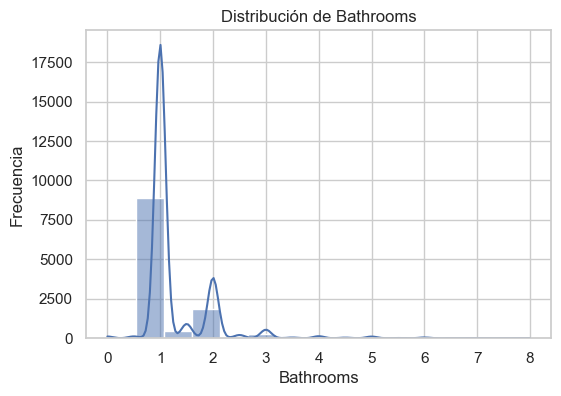

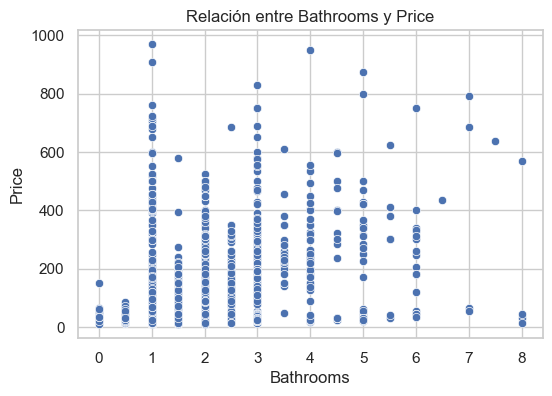

Distribución de Bathrooms:
Bathrooms
1.0    0.752453
2.0    0.154939
1.5    0.036705
3.0    0.021905
2.5    0.008288
4.0    0.005244
0.5    0.004736
0.0    0.004482
5.0    0.004313
6.0    0.002030
3.5    0.001861
4.5    0.001607
5.5    0.000592
8.0    0.000338
7.0    0.000338
6.5    0.000085
7.5    0.000085
Name: proportion, dtype: float64


In [73]:
# Histograma de frecuencia de Bathrooms
plt.figure(figsize=(6, 4))
sns.histplot(data['Bathrooms'], kde=True)
plt.title('Distribución de Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Frecuencia')
plt.show()

# Relaciono entre Bathrooms y Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Bathrooms'], y=data['Price'])
plt.title('Relación entre Bathrooms y Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

# Distribución de valores en 'Bathrooms'
print("Distribución de Bathrooms:")
print(data['Bathrooms'].value_counts(normalize=True))


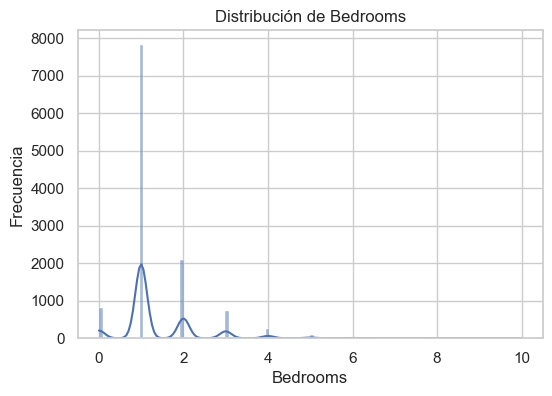

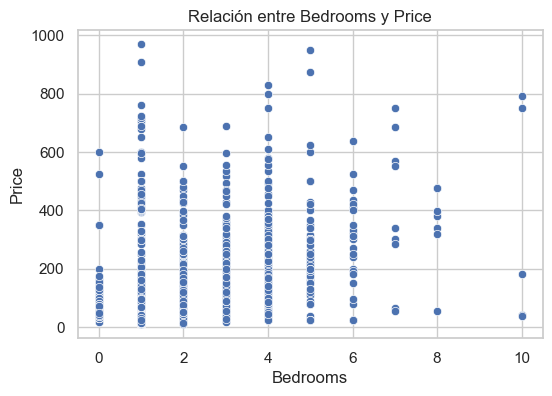

Distribución de Bedrooms:
Bedrooms
1.0     0.661451
2.0     0.176675
0.0     0.068843
3.0     0.062077
4.0     0.020382
5.0     0.006258
6.0     0.002453
7.0     0.000761
8.0     0.000592
10.0    0.000507
Name: proportion, dtype: float64


In [75]:
# Histograma de frecuencia de Bedrooms
plt.figure(figsize=(6, 4))
sns.histplot(data['Bedrooms'], kde=True)
plt.title('Distribución de Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre Bedrooms y Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Bedrooms'], y=data['Price'])
plt.title('Relación entre Bedrooms y Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

# Distribución de valores en 'Bedrooms'
print("Distribución de Bedrooms:")
print(data['Bedrooms'].value_counts(normalize=True))

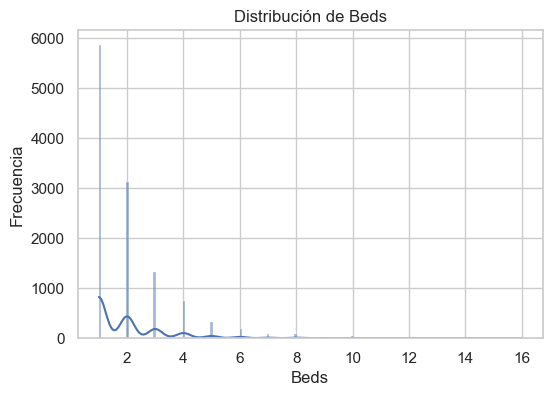

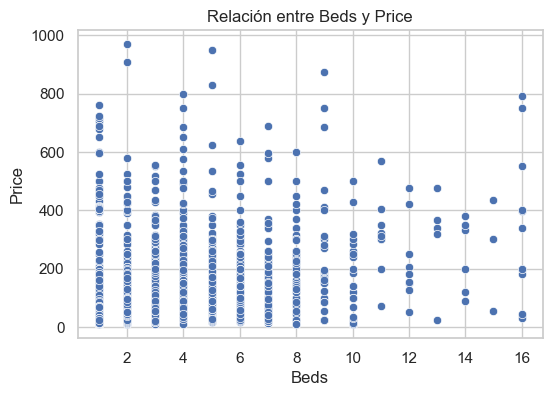

Distribución de Beds:
Beds
1.0     0.495771
2.0     0.264293
3.0     0.111384
4.0     0.062246
5.0     0.026810
6.0     0.015900
7.0     0.007020
8.0     0.006512
10.0    0.003552
9.0     0.002791
16.0    0.001015
11.0    0.000761
12.0    0.000761
14.0    0.000507
13.0    0.000423
15.0    0.000254
Name: proportion, dtype: float64


In [76]:
# Histograma de frecuencia de Beds
plt.figure(figsize=(6, 4))
sns.histplot(data['Beds'], kde=True)
plt.title('Distribución de Beds')
plt.xlabel('Beds')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre Beds y Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Beds'], y=data['Price'])
plt.title('Relación entre Beds y Price')
plt.xlabel('Beds')
plt.ylabel('Price')
plt.show()

# Distribución de valores en 'Beds'
print("Distribución de Beds:")
print(data['Beds'].value_counts(normalize=True))


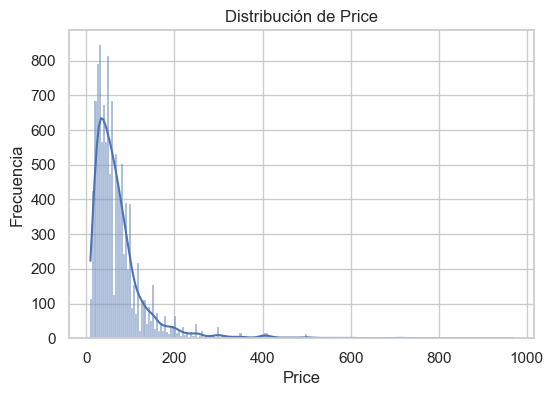

Distribución de Price:
Price
50.0     0.044317
60.0     0.037635
30.0     0.037466
25.0     0.036282
35.0     0.032476
           ...   
213.0    0.000085
182.0    0.000085
227.0    0.000085
327.0    0.000085
366.0    0.000085
Name: proportion, Length: 345, dtype: float64


In [77]:
# Histograma de frecuencia de Price
plt.figure(figsize=(6, 4))
sns.histplot(data['Price'], kde=True)
plt.title('Distribución de Price')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de valores en 'Price'
print("Distribución de Price:")
print(data['Price'].value_counts(normalize=True))


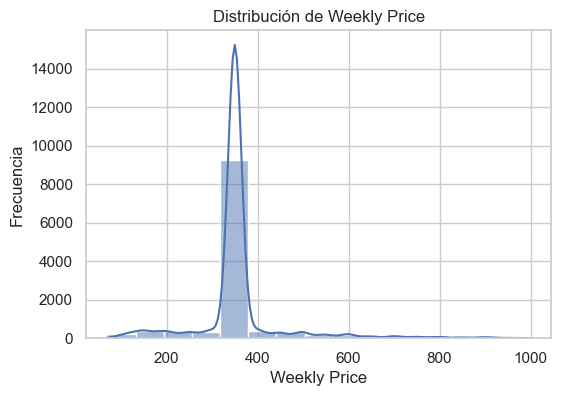

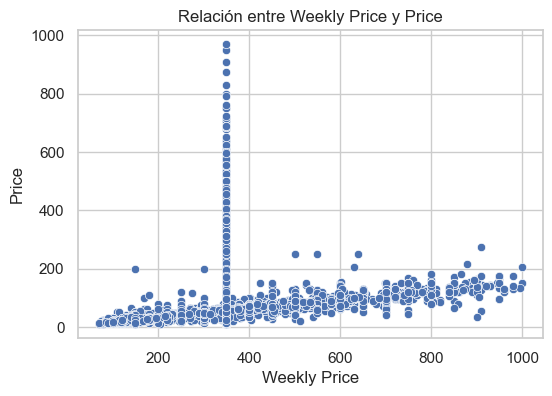

Distribución de Weekly Price:
Weekly Price
350.0    0.765984
300.0    0.012517
400.0    0.011502
500.0    0.009388
250.0    0.008796
           ...   
532.0    0.000085
369.0    0.000085
223.0    0.000085
287.0    0.000085
511.0    0.000085
Name: proportion, Length: 357, dtype: float64


In [78]:
# Histograma de frecuencia de Weekly Price
plt.figure(figsize=(6, 4))
sns.histplot(data['Weekly Price'], kde=True)
plt.title('Distribución de Weekly Price')
plt.xlabel('Weekly Price')
plt.ylabel('Frecuencia')
plt.show()

# Relaciono entre Weekly Price y Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Weekly Price'], y=data['Price'])
plt.title('Relación entre Weekly Price y Price')
plt.xlabel('Weekly Price')
plt.ylabel('Price')
plt.show()

# Distribución de valores en 'Weekly Price'
print("Distribución de Weekly Price:")
print(data['Weekly Price'].value_counts(normalize=True))

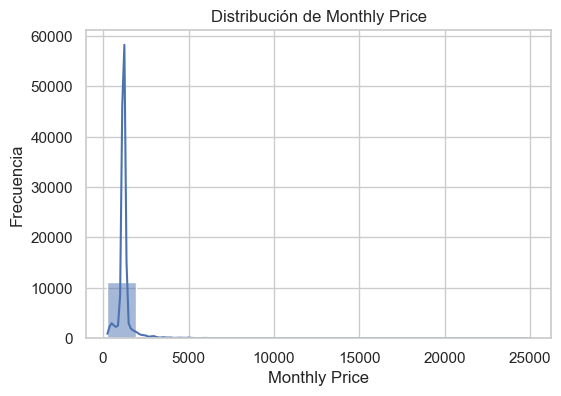

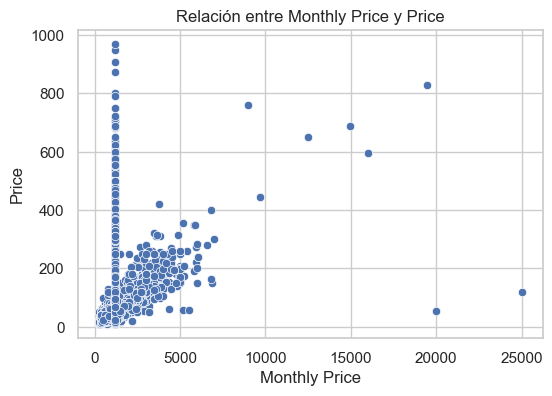

Distribución de Monthly Price:
Monthly Price
1200.0    0.766492
1500.0    0.009557
1400.0    0.007865
1300.0    0.006766
1000.0    0.006681
            ...   
3528.0    0.000085
2583.0    0.000085
4799.0    0.000085
2998.0    0.000085
1503.0    0.000085
Name: proportion, Length: 521, dtype: float64


In [79]:
# Histograma de frecuencia de Monthly Price
plt.figure(figsize=(6, 4))
sns.histplot(data['Monthly Price'], kde=True)
plt.title('Distribución de Monthly Price')
plt.xlabel('Monthly Price')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre Monthly Price y Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Monthly Price'], y=data['Price'])
plt.title('Relación entre Monthly Price y Price')
plt.xlabel('Monthly Price')
plt.ylabel('Price')
plt.show()

# Distribución de valores en 'Monthly Price'
print("Distribución de Monthly Price:")
print(data['Monthly Price'].value_counts(normalize=True))


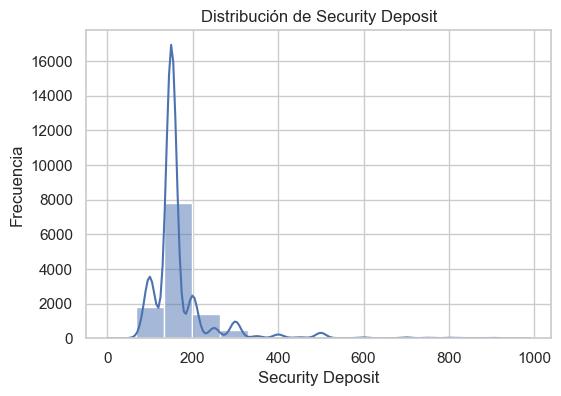

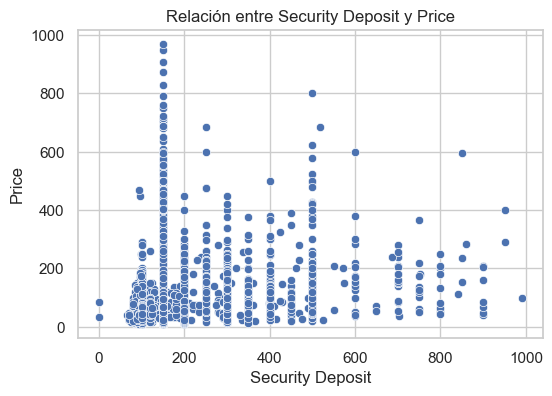

Distribución de Security Deposit:
Security Deposit
150.0    0.651133
100.0    0.112483
200.0    0.092608
300.0    0.035859
250.0    0.022581
           ...   
301.0    0.000085
159.0    0.000085
210.0    0.000085
399.0    0.000085
990.0    0.000085
Name: proportion, Length: 115, dtype: float64


In [80]:
# Histograma de frecuencia de Security Deposit
plt.figure(figsize=(6, 4))
sns.histplot(data['Security Deposit'], kde=True)
plt.title('Distribución de Security Deposit')
plt.xlabel('Security Deposit')
plt.ylabel('Frecuencia')
plt.show()

# Relaciono entre Security Deposit y Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Security Deposit'], y=data['Price'])
plt.title('Relación entre Security Deposit y Price')
plt.xlabel('Security Deposit')
plt.ylabel('Price')
plt.show()

# Distribución de valores en 'Security Deposit'
print("Distribución de Security Deposit:")
print(data['Security Deposit'].value_counts(normalize=True))

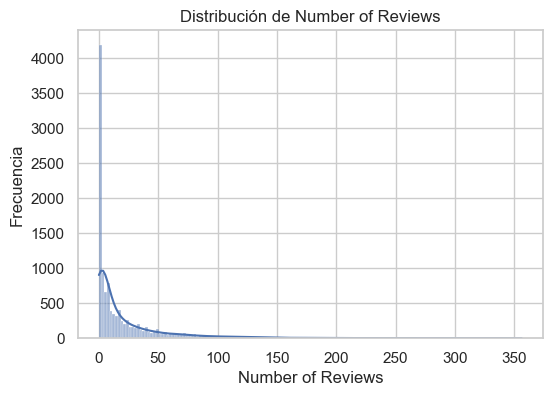

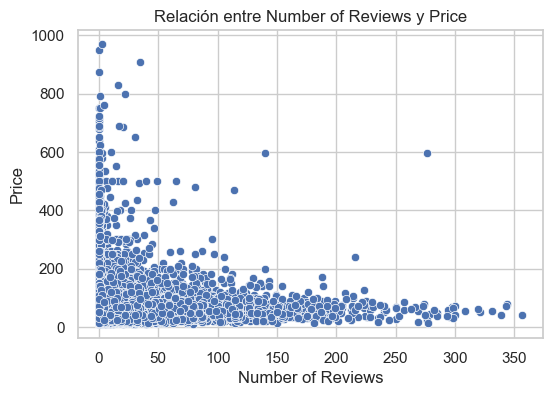

Distribución de Number of Reviews:
Number of Reviews
0      0.214733
1      0.085842
2      0.053620
3      0.042033
4      0.036705
         ...   
319    0.000085
253    0.000085
296    0.000085
225    0.000085
208    0.000085
Name: proportion, Length: 250, dtype: float64


In [81]:
# Histograma de frecuencia de Number of Reviews
plt.figure(figsize=(6, 4))
sns.histplot(data['Number of Reviews'], kde=True)
plt.title('Distribución de Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frecuencia')
plt.show()

# Relaciono entre Number of Reviews y Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Number of Reviews'], y=data['Price'])
plt.title('Relación entre Number of Reviews y Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

# Distribución de valores en 'Number of Reviews'
print("Distribución de Number of Reviews:")
print(data['Number of Reviews'].value_counts(normalize=True))

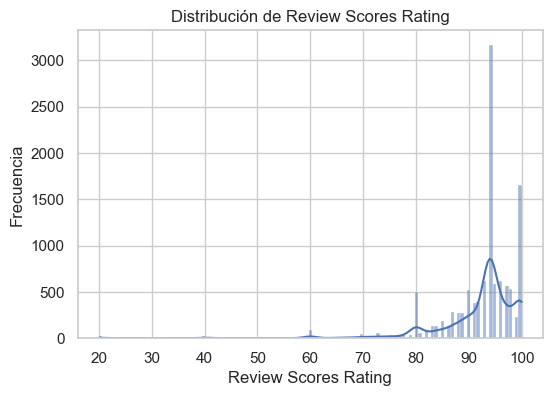

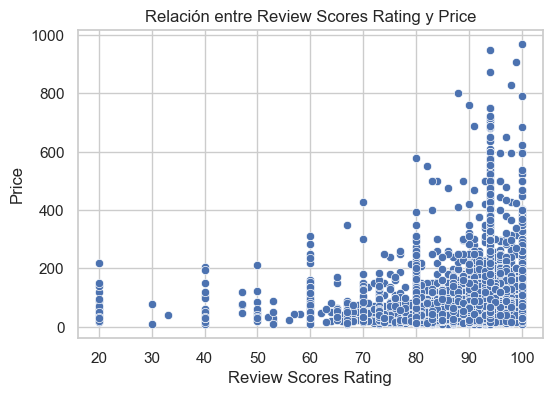

In [82]:
# Histograma de frecuencia de Review Scores Rating
plt.figure(figsize=(6, 4))
sns.histplot(data['Review Scores Rating'], kde=True)
plt.title('Distribución de Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Frecuencia')
plt.show()

# Relaciono entre Review Scores Rating y Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Review Scores Rating'], y=data['Price'])
plt.title('Relación entre Review Scores Rating y Price')
plt.xlabel('Review Scores Rating')
plt.ylabel('Price')
plt.show()


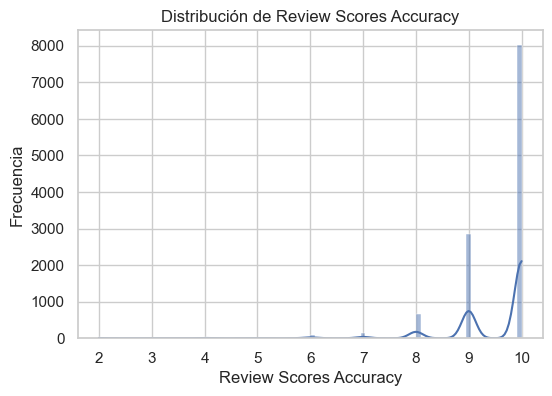

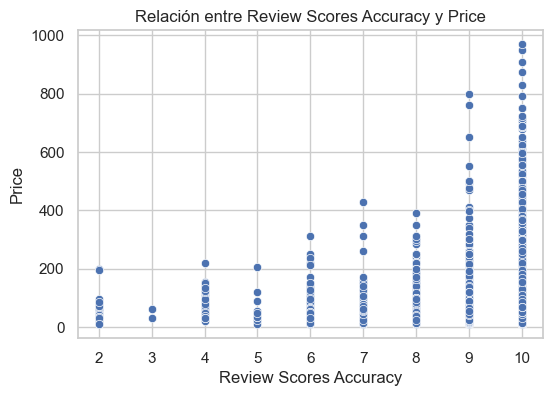

In [83]:
# Histograma de frecuencia de Review Scores Accuracy
plt.figure(figsize=(6, 4))
sns.histplot(data['Review Scores Accuracy'], kde=True)
plt.title('Distribución de Review Scores Accuracy')
plt.xlabel('Review Scores Accuracy')
plt.ylabel('Frecuencia')
plt.show()

# Relaciono entre Review Scores Accuracy y Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Review Scores Accuracy'], y=data['Price'])
plt.title('Relación entre Review Scores Accuracy y Price')
plt.xlabel('Review Scores Accuracy')
plt.ylabel('Price')
plt.show()


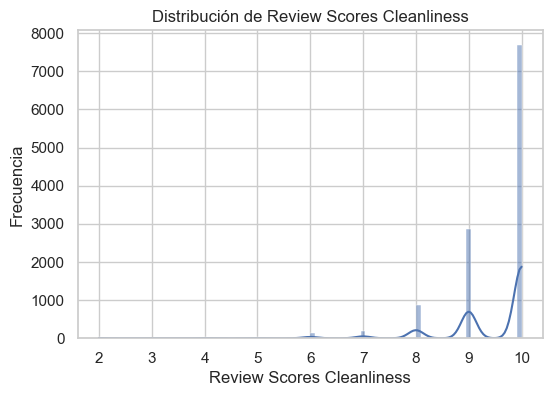

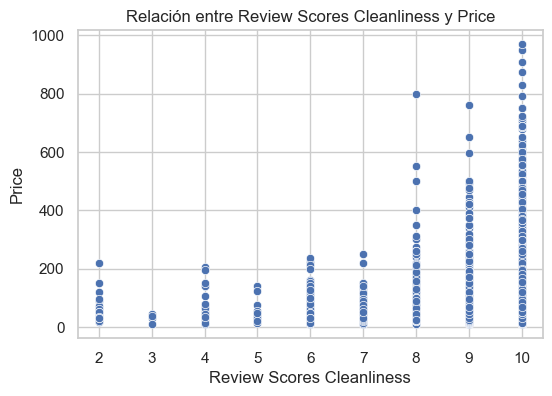

In [84]:
# Histograma de frecuencia de Review Scores Cleanliness
plt.figure(figsize=(6, 4))
sns.histplot(data['Review Scores Cleanliness'], kde=True)
plt.title('Distribución de Review Scores Cleanliness')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Frecuencia')
plt.show()

# Relaciono entre Review Scores Cleanliness y Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Review Scores Cleanliness'], y=data['Price'])
plt.title('Relación entre Review Scores Cleanliness y Price')
plt.xlabel('Review Scores Cleanliness')
plt.ylabel('Price')
plt.show()


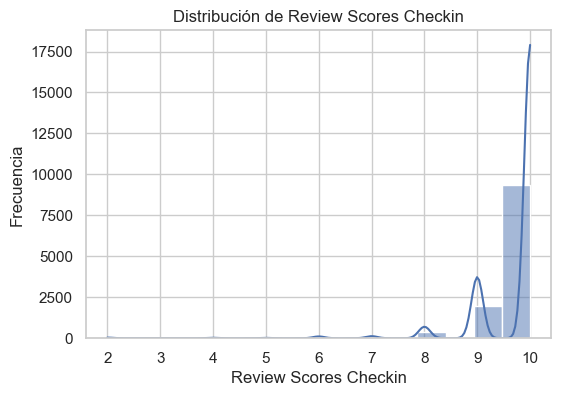

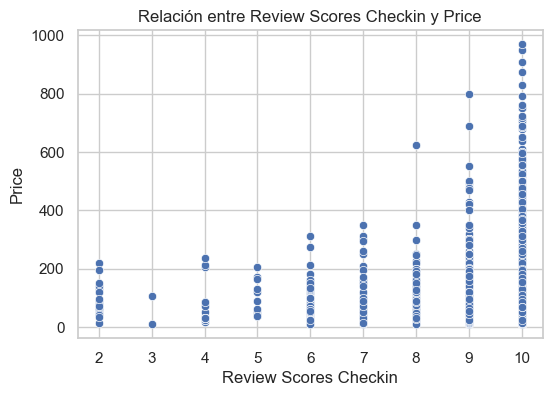

In [85]:
# Histograma de frecuencia de Review Scores Checkin
plt.figure(figsize=(6, 4))
sns.histplot(data['Review Scores Checkin'], kde=True)
plt.title('Distribución de Review Scores Checkin')
plt.xlabel('Review Scores Checkin')
plt.ylabel('Frecuencia')
plt.show()

# Relaciono entre Review Scores Checkin y Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Review Scores Checkin'], y=data['Price'])
plt.title('Relación entre Review Scores Checkin y Price')
plt.xlabel('Review Scores Checkin')
plt.ylabel('Price')
plt.show()


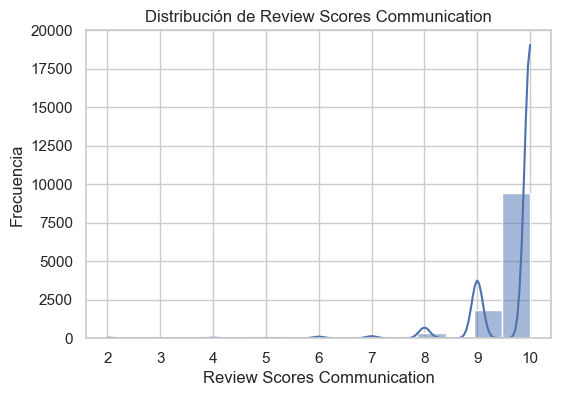

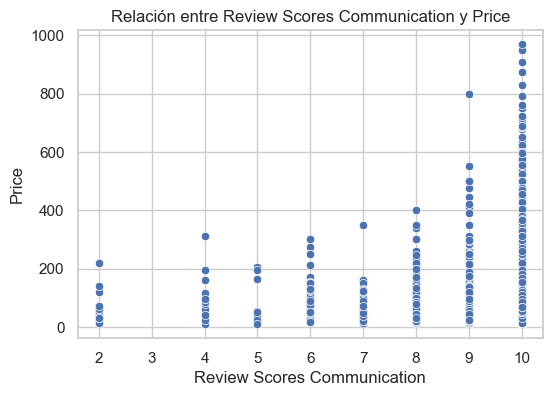

In [86]:
# Histograma de frecuencia de Review Scores Communication
plt.figure(figsize=(6, 4))
sns.histplot(data['Review Scores Communication'], kde=True)
plt.title('Distribución de Review Scores Communication')
plt.xlabel('Review Scores Communication')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre Review Scores Communication y Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Review Scores Communication'], y=data['Price'])
plt.title('Relación entre Review Scores Communication y Price')
plt.xlabel('Review Scores Communication')
plt.ylabel('Price')
plt.show()


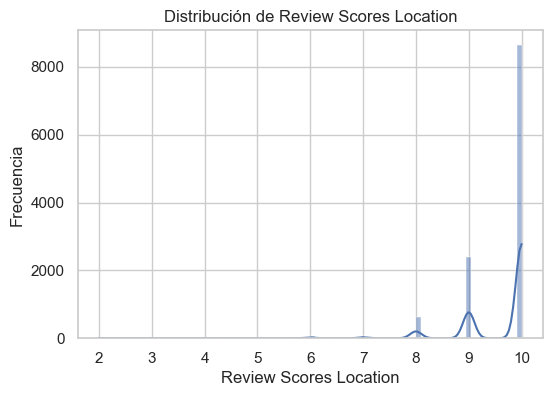

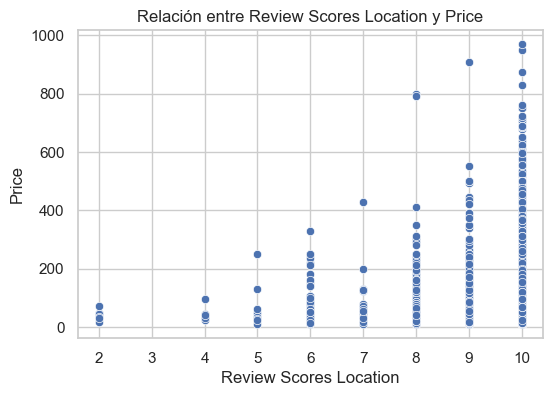

In [87]:
# Histograma de frecuencia de Review Scores Location
plt.figure(figsize=(6, 4))
sns.histplot(data['Review Scores Location'], kde=True)
plt.title('Distribución de Review Scores Location')
plt.xlabel('Review Scores Location')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre Review Scores Location y Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Review Scores Location'], y=data['Price'])
plt.title('Relación entre Review Scores Location y Price')
plt.xlabel('Review Scores Location')
plt.ylabel('Price')
plt.show()


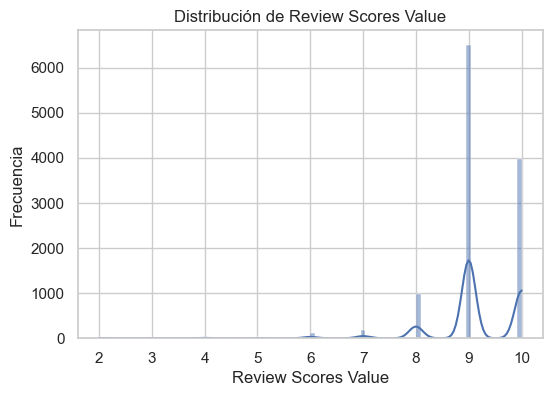

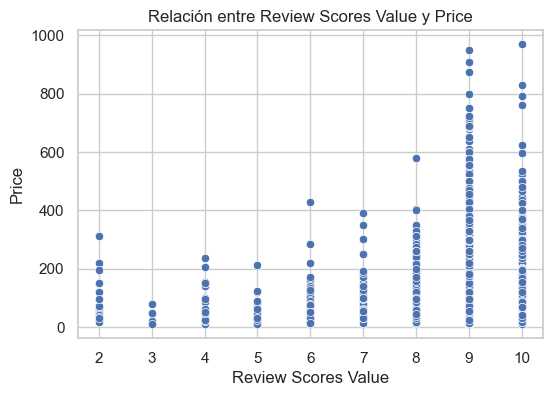

In [88]:
# Histograma de frecuencia de Review Scores Value
plt.figure(figsize=(6, 4))
sns.histplot(data['Review Scores Value'], kde=True)
plt.title('Distribución de Review Scores Value')
plt.xlabel('Review Scores Value')
plt.ylabel('Frecuencia')
plt.show()

# Relaciono entre Review Scores Value y Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Review Scores Value'], y=data['Price'])
plt.title('Relación entre Review Scores Value y Price')
plt.xlabel('Review Scores Value')
plt.ylabel('Price')
plt.show()


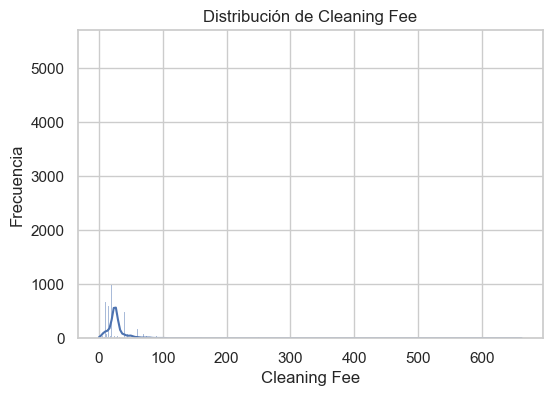

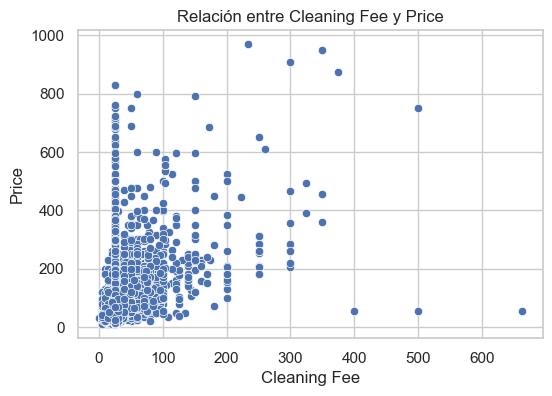

In [89]:
# Histograma de frecuencia de Cleaning Fee
plt.figure(figsize=(6, 4))
sns.histplot(data['Cleaning Fee'], kde=True)
plt.title('Distribución de Cleaning Fee')
plt.xlabel('Cleaning Fee')
plt.ylabel('Frecuencia')
plt.show()

# Relaciono entre Cleaning Fee y Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Cleaning Fee'], y=data['Price'])
plt.title('Relación entre Cleaning Fee y Price')
plt.xlabel('Cleaning Fee')
plt.ylabel('Price')
plt.show()

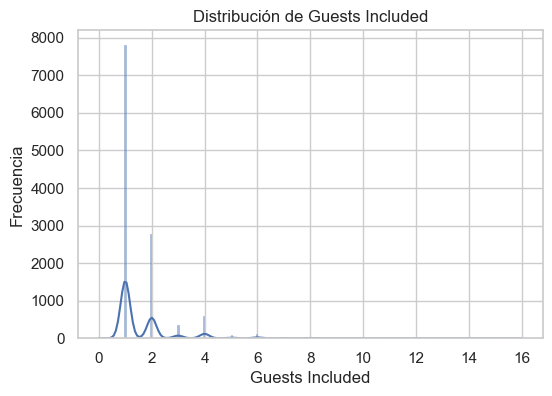

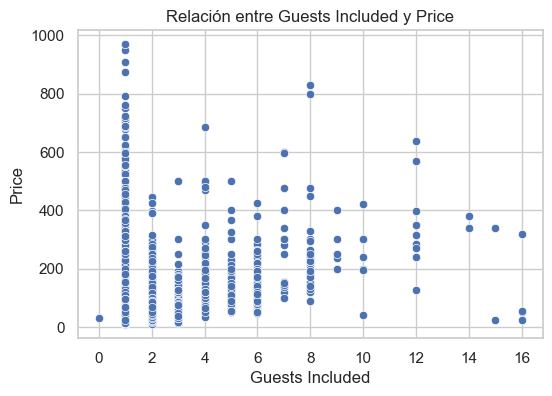

In [90]:
# Histograma de frecuencia de Guests Included
plt.figure(figsize=(6, 4))
sns.histplot(data['Guests Included'], kde=True)
plt.title('Distribución de Guests Included')
plt.xlabel('Guests Included')
plt.ylabel('Frecuencia')
plt.show()

# Relaciono entre Guests Included y Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Guests Included'], y=data['Price'])
plt.title('Relación entre Guests Included y Price')
plt.xlabel('Guests Included')
plt.ylabel('Price')
plt.show()

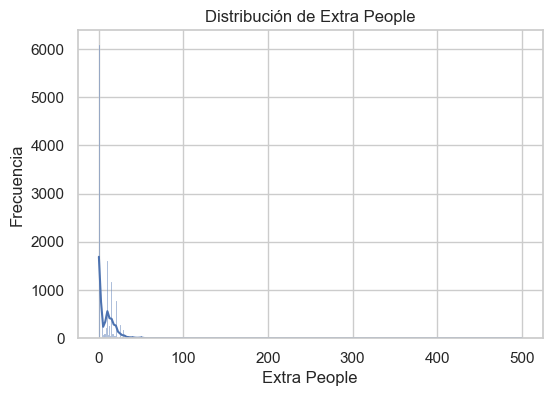

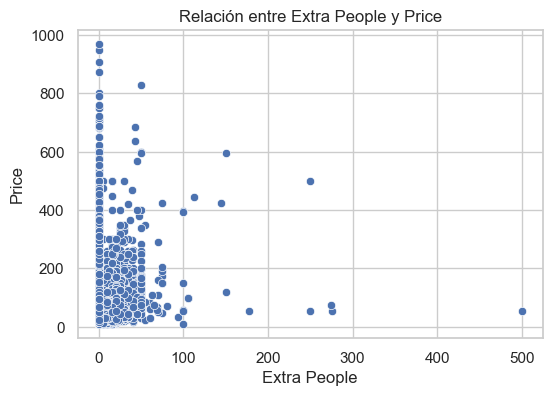

In [91]:
# Histograma de frecuencia de Extra People
plt.figure(figsize=(6, 4))
sns.histplot(data['Extra People'], kde=True)
plt.title('Distribución de Extra People')
plt.xlabel('Extra People')
plt.ylabel('Frecuencia')
plt.show()

# Relaciono entre Extra People y Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Extra People'], y=data['Price'])
plt.title('Relación entre Extra People y Price')
plt.xlabel('Extra People')
plt.ylabel('Price')
plt.show()

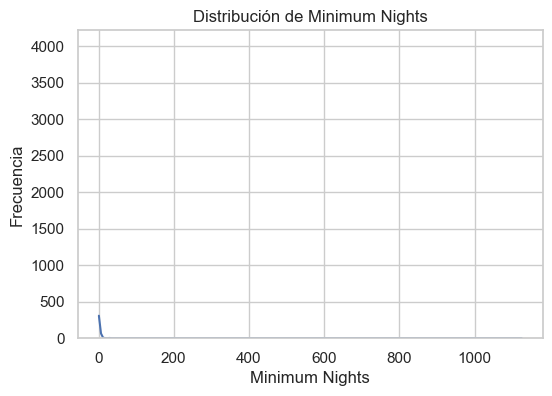

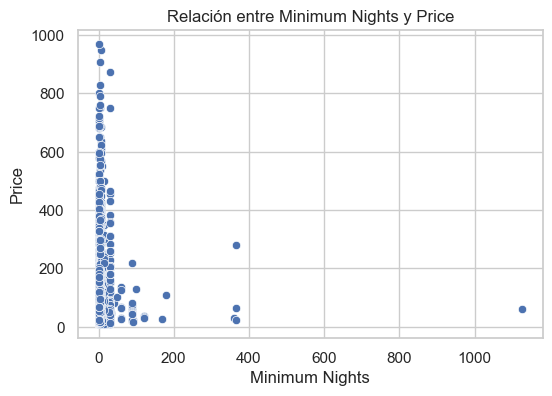

In [92]:
# Histograma de frecuencia de Minimum Nights
plt.figure(figsize=(6, 4))
sns.histplot(data['Minimum Nights'], kde=True)
plt.title('Distribución de Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Frecuencia')
plt.show()

# Relaciono entre Minimum Nights y Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Minimum Nights'], y=data['Price'])
plt.title('Relación entre Minimum Nights y Price')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.show()

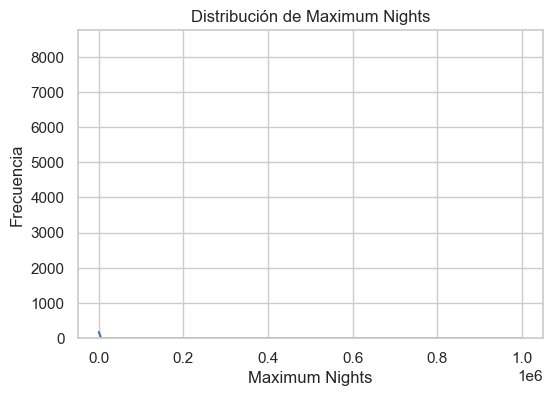

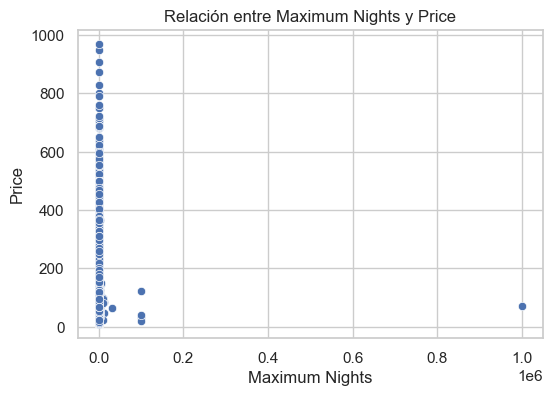

In [93]:
# Histograma de frecuencia de Maximum Nights
plt.figure(figsize=(6, 4))
sns.histplot(data['Maximum Nights'], kde=True)
plt.title('Distribución de Maximum Nights')
plt.xlabel('Maximum Nights')
plt.ylabel('Frecuencia')
plt.show()

# Relaciono entre Maximum Nights y Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Maximum Nights'], y=data['Price'])
plt.title('Relación entre Maximum Nights y Price')
plt.xlabel('Maximum Nights')
plt.ylabel('Price')
plt.show()

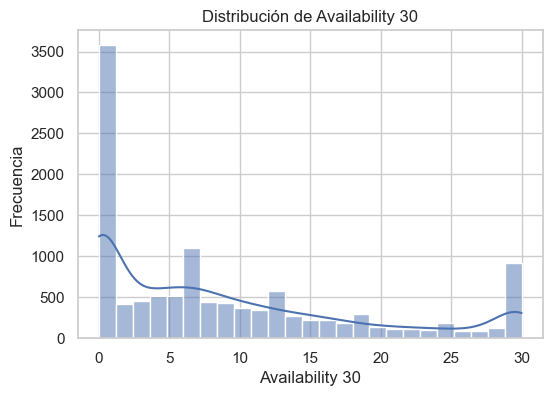

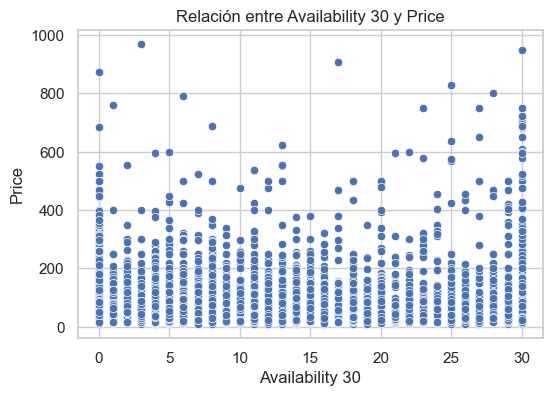

In [94]:
# Histograma de frecuencia de Availability 30
plt.figure(figsize=(6, 4))
sns.histplot(data['Availability 30'], kde=True)
plt.title('Distribución de Availability 30')
plt.xlabel('Availability 30')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre Availability 30 y Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Availability 30'], y=data['Price'])
plt.title('Relación entre Availability 30 y Price')
plt.xlabel('Availability 30')
plt.ylabel('Price')
plt.show()

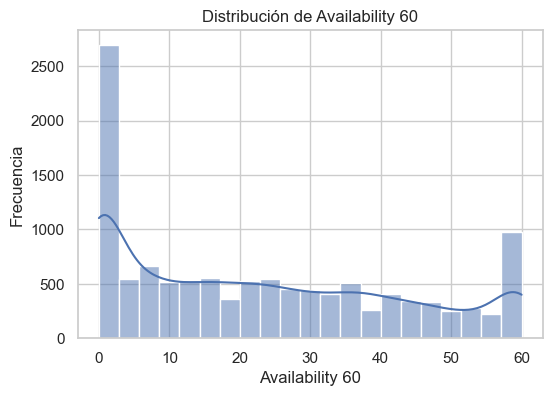

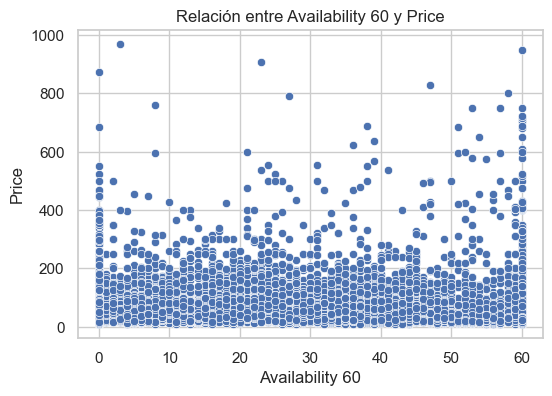

In [95]:
# Histograma de frecuencia de Availability 60
plt.figure(figsize=(6, 4))
sns.histplot(data['Availability 60'], kde=True)
plt.title('Distribución de Availability 60')
plt.xlabel('Availability 60')
plt.ylabel('Frecuencia')
plt.show()

# Relaciono entre Availability 60 y Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Availability 60'], y=data['Price'])
plt.title('Relación entre Availability 60 y Price')
plt.xlabel('Availability 60')
plt.ylabel('Price')
plt.show()

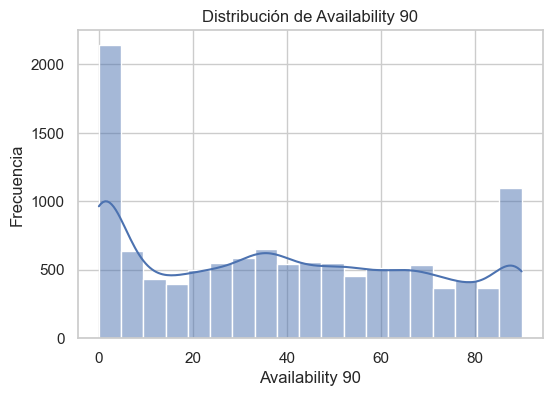

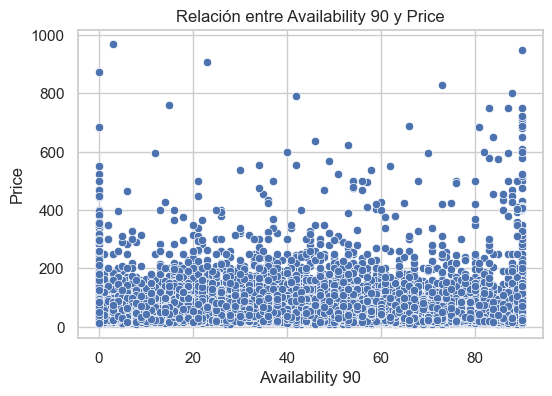

In [96]:
# Histograma de frecuencia de Availability 90
plt.figure(figsize=(6, 4))
sns.histplot(data['Availability 90'], kde=True)
plt.title('Distribución de Availability 90')
plt.xlabel('Availability 90')
plt.ylabel('Frecuencia')
plt.show()

# Relaciono entre Availability 90 y Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Availability 90'], y=data['Price'])
plt.title('Relación entre Availability 90 y Price')
plt.xlabel('Availability 90')
plt.ylabel('Price')
plt.show()

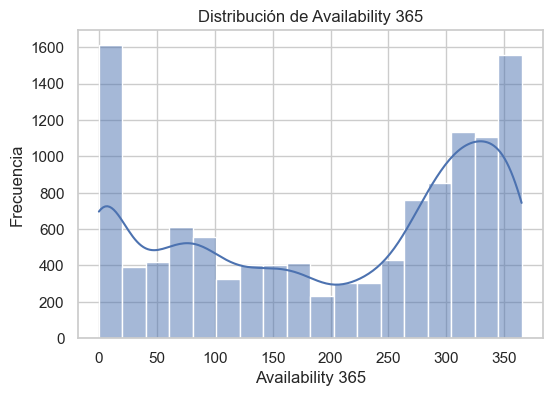

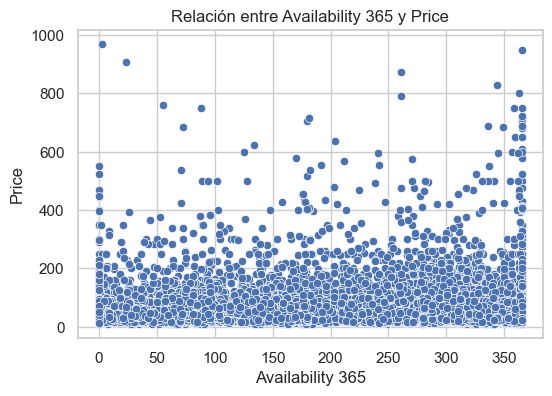

In [97]:
# Histograma de frecuencia de Availability 365
plt.figure(figsize=(6, 4))
sns.histplot(data['Availability 365'], kde=True)
plt.title('Distribución de Availability 365')
plt.xlabel('Availability 365')
plt.ylabel('Frecuencia')
plt.show()

# Relaciono entre Availability 365 y Price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['Availability 365'], y=data['Price'])
plt.title('Relación entre Availability 365 y Price')
plt.xlabel('Availability 365')
plt.ylabel('Price')
plt.show()

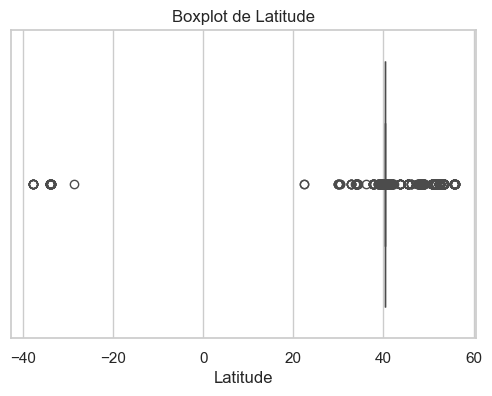

Distribución de Latitude:
Latitude
40.407732    0.000085
40.435350    0.000085
40.431497    0.000085
52.486072    0.000085
41.889325    0.000085
               ...   
40.451928    0.000085
40.398294    0.000085
40.412336    0.000085
40.390106    0.000085
40.431011    0.000085
Name: proportion, Length: 11824, dtype: float64




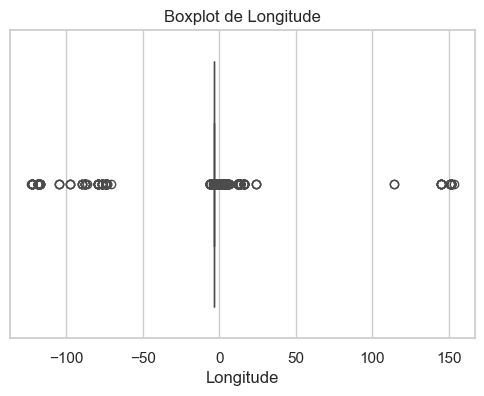

Distribución de Longitude:
Longitude
-3.684819     0.000085
-3.672415     0.000085
-3.717844     0.000085
 13.390524    0.000085
 12.460886    0.000085
                ...   
-3.699014     0.000085
-3.696689     0.000085
-3.704877     0.000085
-3.687223     0.000085
-3.677769     0.000085
Name: proportion, Length: 11824, dtype: float64




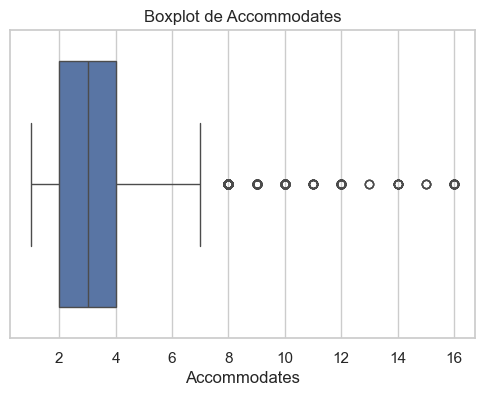

Distribución de Accommodates:
Accommodates
2     0.357493
4     0.221076
1     0.138278
3     0.096414
6     0.079753
5     0.046854
8     0.022581
7     0.014800
10    0.008288
9     0.004990
12    0.003637
16    0.002622
11    0.001607
14    0.001015
15    0.000338
13    0.000254
Name: proportion, dtype: float64




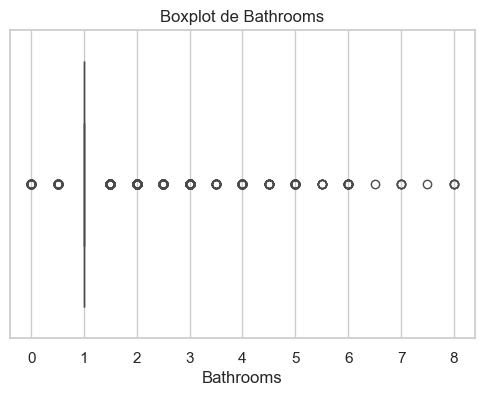

Distribución de Bathrooms:
Bathrooms
1.0    0.752453
2.0    0.154939
1.5    0.036705
3.0    0.021905
2.5    0.008288
4.0    0.005244
0.5    0.004736
0.0    0.004482
5.0    0.004313
6.0    0.002030
3.5    0.001861
4.5    0.001607
5.5    0.000592
8.0    0.000338
7.0    0.000338
6.5    0.000085
7.5    0.000085
Name: proportion, dtype: float64




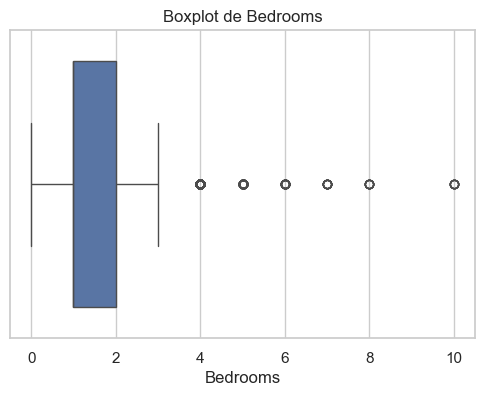

Distribución de Bedrooms:
Bedrooms
1.0     0.661451
2.0     0.176675
0.0     0.068843
3.0     0.062077
4.0     0.020382
5.0     0.006258
6.0     0.002453
7.0     0.000761
8.0     0.000592
10.0    0.000507
Name: proportion, dtype: float64




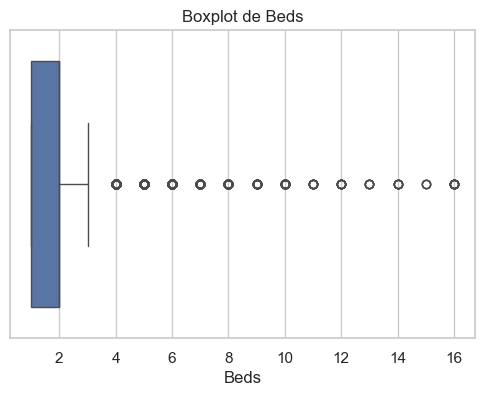

Distribución de Beds:
Beds
1.0     0.495771
2.0     0.264293
3.0     0.111384
4.0     0.062246
5.0     0.026810
6.0     0.015900
7.0     0.007020
8.0     0.006512
10.0    0.003552
9.0     0.002791
16.0    0.001015
11.0    0.000761
12.0    0.000761
14.0    0.000507
13.0    0.000423
15.0    0.000254
Name: proportion, dtype: float64




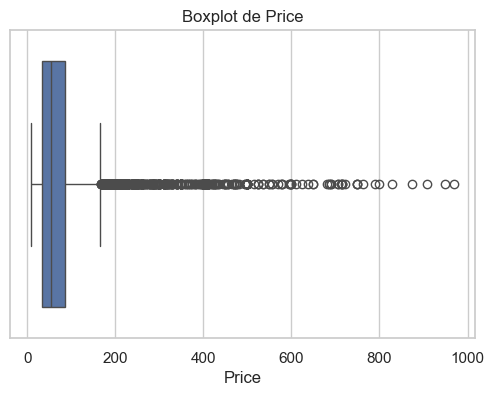

Distribución de Price:
Price
50.0     0.044317
60.0     0.037635
30.0     0.037466
25.0     0.036282
35.0     0.032476
           ...   
213.0    0.000085
182.0    0.000085
227.0    0.000085
327.0    0.000085
366.0    0.000085
Name: proportion, Length: 345, dtype: float64




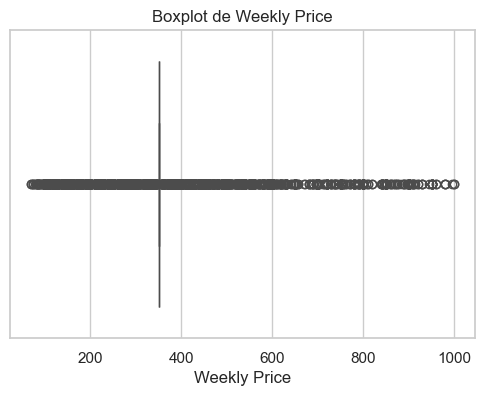

Distribución de Weekly Price:
Weekly Price
350.0    0.765984
300.0    0.012517
400.0    0.011502
500.0    0.009388
250.0    0.008796
           ...   
532.0    0.000085
369.0    0.000085
223.0    0.000085
287.0    0.000085
511.0    0.000085
Name: proportion, Length: 357, dtype: float64




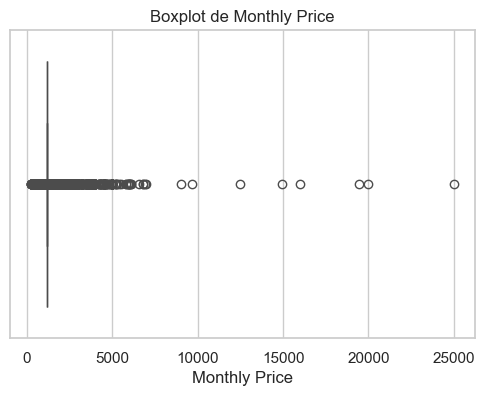

Distribución de Monthly Price:
Monthly Price
1200.0    0.766492
1500.0    0.009557
1400.0    0.007865
1300.0    0.006766
1000.0    0.006681
            ...   
3528.0    0.000085
2583.0    0.000085
4799.0    0.000085
2998.0    0.000085
1503.0    0.000085
Name: proportion, Length: 521, dtype: float64




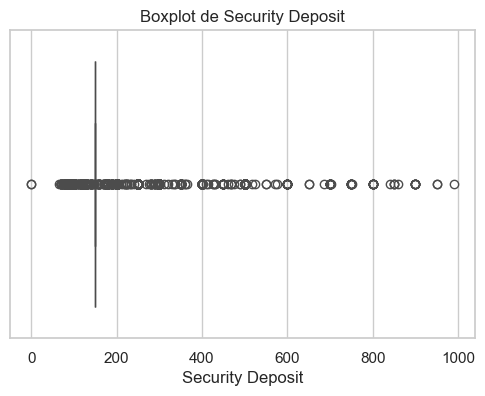

Distribución de Security Deposit:
Security Deposit
150.0    0.651133
100.0    0.112483
200.0    0.092608
300.0    0.035859
250.0    0.022581
           ...   
301.0    0.000085
159.0    0.000085
210.0    0.000085
399.0    0.000085
990.0    0.000085
Name: proportion, Length: 115, dtype: float64




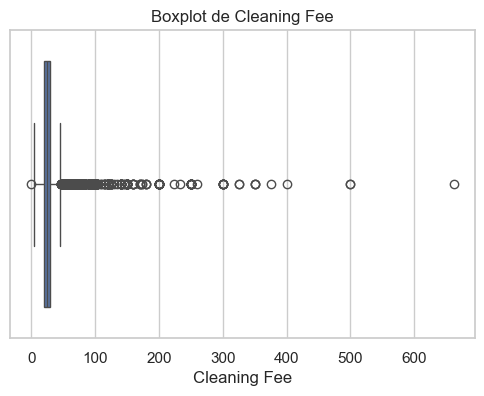

Distribución de Cleaning Fee:
Cleaning Fee
25.0     0.458897
30.0     0.093200
20.0     0.083728
10.0     0.057426
15.0     0.050491
           ...   
99.0     0.000085
82.0     0.000085
223.0    0.000085
135.0    0.000085
73.0     0.000085
Name: proportion, Length: 104, dtype: float64




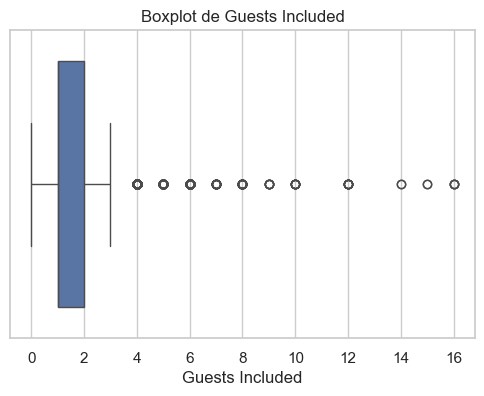

Distribución de Guests Included:
Guests Included
1     0.660267
2     0.235284
4     0.050575
3     0.030108
6     0.009557
5     0.006681
8     0.002876
7     0.001945
12    0.000761
10    0.000677
9     0.000507
16    0.000338
15    0.000169
14    0.000169
0     0.000085
Name: proportion, dtype: float64




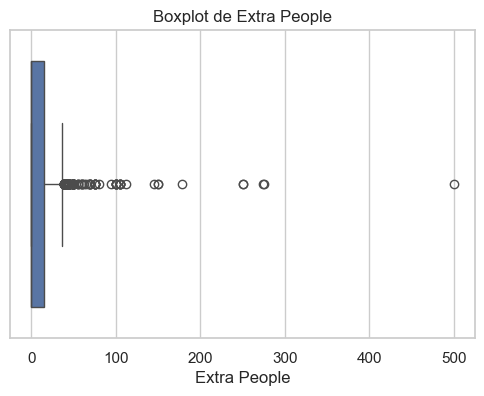

Distribución de Extra People:
Extra People
0      0.514462
10     0.135403
15     0.098698
20     0.064022
5      0.038566
         ...   
34     0.000085
178    0.000085
80     0.000085
65     0.000085
49     0.000085
Name: proportion, Length: 63, dtype: float64




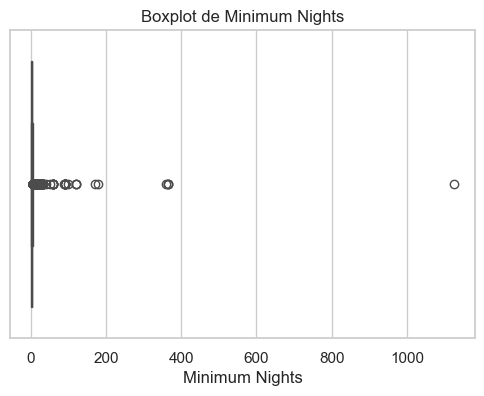

Distribución de Minimum Nights:
Minimum Nights
2       0.339733
1       0.337788
3       0.165088
5       0.042456
4       0.042287
7       0.030616
10      0.010825
6       0.008119
30      0.006258
15      0.004482
14      0.002791
20      0.001861
12      0.001015
28      0.000846
90      0.000761
60      0.000592
8       0.000592
9       0.000423
21      0.000423
25      0.000338
13      0.000254
120     0.000254
365     0.000254
32      0.000169
26      0.000169
91      0.000169
31      0.000169
17      0.000169
24      0.000085
40      0.000085
360     0.000085
99      0.000085
89      0.000085
170     0.000085
11      0.000085
180     0.000085
27      0.000085
19      0.000085
1125    0.000085
50      0.000085
29      0.000085
Name: proportion, dtype: float64




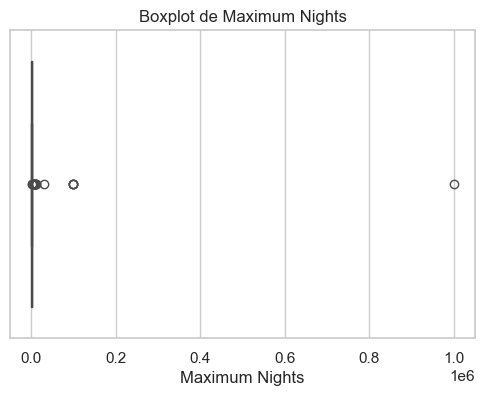

Distribución de Maximum Nights:
Maximum Nights
1125    0.704415
30      0.042963
365     0.031377
7       0.019790
15      0.018353
          ...   
444     0.000085
196     0.000085
166     0.000085
59      0.000085
1117    0.000085
Name: proportion, Length: 160, dtype: float64




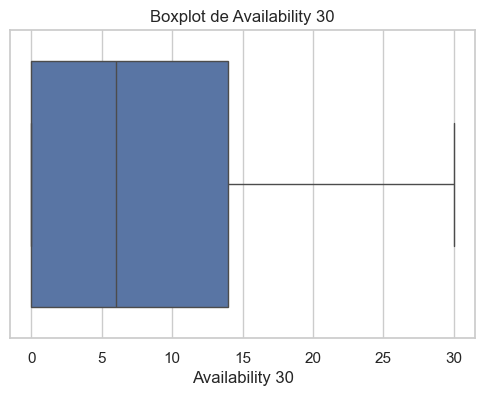

Distribución de Availability 30:
Availability 30
0     0.268437
30    0.054973
7     0.048461
6     0.044317
5     0.043894
4     0.043725
3     0.038735
8     0.037635
9     0.036113
2     0.035267
1     0.034506
10    0.030869
11    0.029432
12    0.027064
14    0.022919
29    0.022497
13    0.021905
15    0.019198
16    0.018775
17    0.015308
18    0.014378
20    0.011333
19    0.010656
28    0.010403
21    0.009557
22    0.009472
23    0.008796
24    0.008711
26    0.007781
27    0.007527
25    0.007358
Name: proportion, dtype: float64




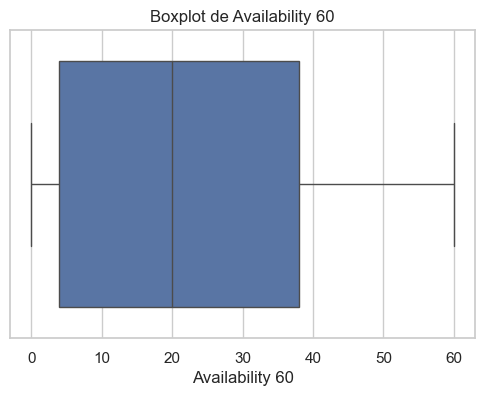

Distribución de Availability 60:
Availability 60
0     0.197141
60    0.051421
6     0.026725
59    0.021397
5     0.019537
        ...   
57    0.007104
50    0.007104
51    0.006512
56    0.006428
55    0.005159
Name: proportion, Length: 61, dtype: float64




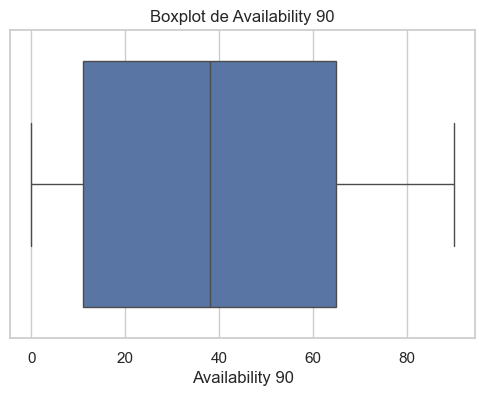

Distribución de Availability 90:
Availability 90
0     0.144367
90    0.049053
89    0.021059
36    0.020044
6     0.017168
        ...   
82    0.006428
81    0.006005
79    0.005920
86    0.005836
85    0.005074
Name: proportion, Length: 91, dtype: float64




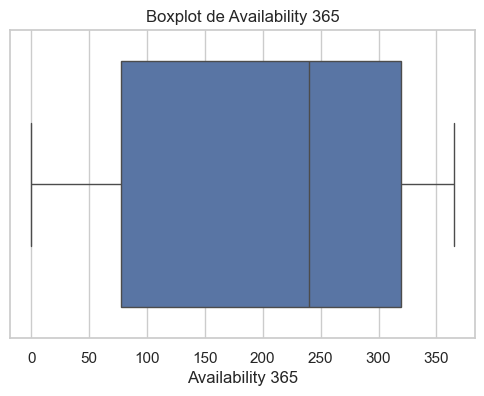

Distribución de Availability 365:
Availability 365
0      0.091763
365    0.040342
364    0.013194
311    0.011079
281    0.010318
         ...   
205    0.000507
222    0.000507
200    0.000423
183    0.000423
116    0.000423
Name: proportion, Length: 366, dtype: float64




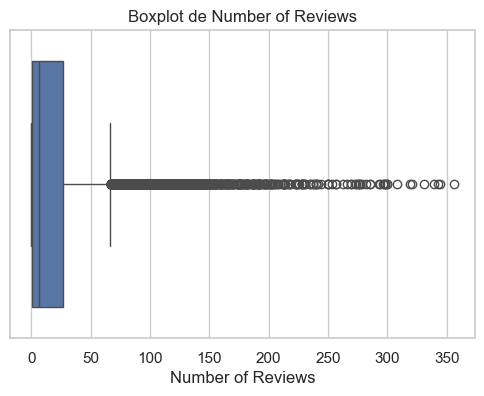

Distribución de Number of Reviews:
Number of Reviews
0      0.214733
1      0.085842
2      0.053620
3      0.042033
4      0.036705
         ...   
319    0.000085
253    0.000085
296    0.000085
225    0.000085
208    0.000085
Name: proportion, Length: 250, dtype: float64




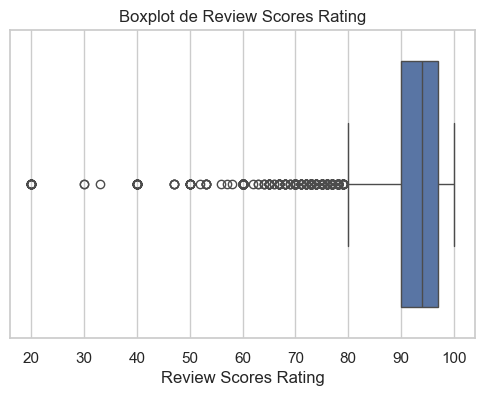

Distribución de Review Scores Rating:
Review Scores Rating
94.0     0.267845
100.0    0.140223
96.0     0.052436
93.0     0.052267
95.0     0.049729
97.0     0.047784
98.0     0.044655
90.0     0.044232
80.0     0.042033
92.0     0.033237
91.0     0.032392
87.0     0.023512
88.0     0.023258
89.0     0.022835
99.0     0.019198
85.0     0.015308
84.0     0.011079
83.0     0.010910
86.0     0.010910
60.0     0.007781
82.0     0.006512
81.0     0.004482
73.0     0.004313
70.0     0.004229
78.0     0.003975
77.0     0.003298
75.0     0.002960
79.0     0.002453
76.0     0.002368
40.0     0.002114
20.0     0.001945
67.0     0.001438
74.0     0.001269
72.0     0.001099
50.0     0.001015
71.0     0.000930
65.0     0.000930
68.0     0.000761
53.0     0.000423
47.0     0.000338
64.0     0.000254
69.0     0.000254
66.0     0.000169
30.0     0.000169
63.0     0.000169
52.0     0.000085
56.0     0.000085
58.0     0.000085
62.0     0.000085
33.0     0.000085
57.0     0.000085
Name: proportion, dtype

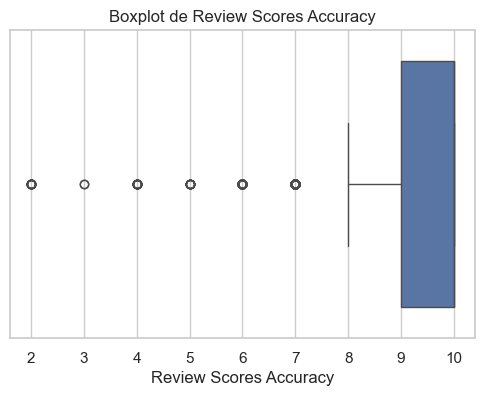

Distribución de Review Scores Accuracy:
Review Scores Accuracy
10.0    0.678535
9.0     0.240020
8.0     0.056411
7.0     0.011587
6.0     0.007696
4.0     0.002368
2.0     0.002114
5.0     0.001099
3.0     0.000169
Name: proportion, dtype: float64




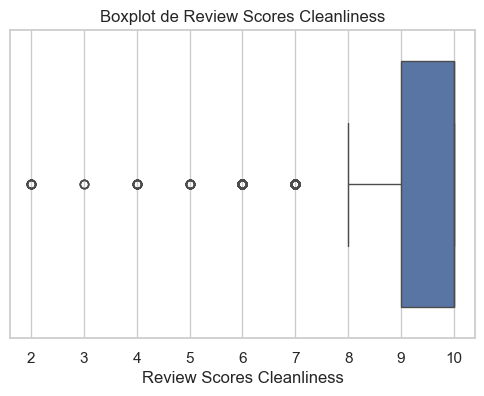

Distribución de Review Scores Cleanliness:
Review Scores Cleanliness
10.0    0.650372
9.0     0.241458
8.0     0.073241
7.0     0.016915
6.0     0.011756
4.0     0.002030
2.0     0.001945
5.0     0.001945
3.0     0.000338
Name: proportion, dtype: float64




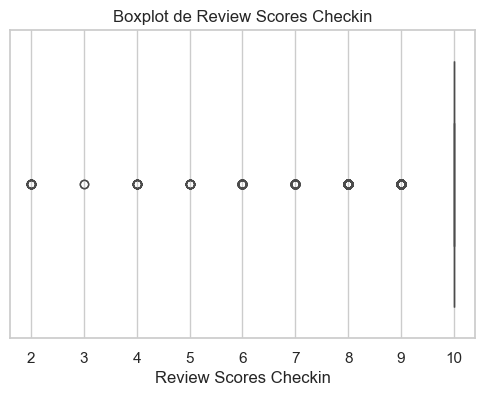

Distribución de Review Scores Checkin:
Review Scores Checkin
10.0    0.789834
9.0     0.164581
8.0     0.030954
7.0     0.005582
6.0     0.004821
2.0     0.001776
4.0     0.001269
5.0     0.001015
3.0     0.000169
Name: proportion, dtype: float64




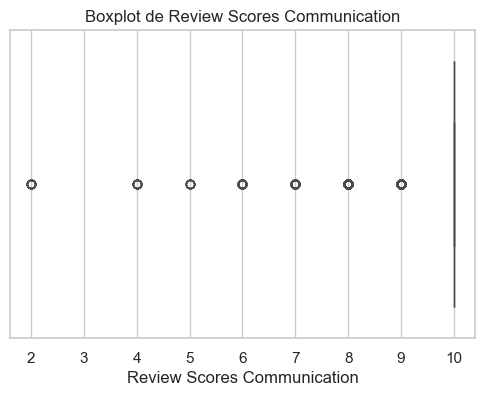

Distribución de Review Scores Communication:
Review Scores Communication
10.0    0.800068
9.0     0.157561
8.0     0.029093
7.0     0.005497
6.0     0.004313
2.0     0.001438
4.0     0.001269
5.0     0.000761
Name: proportion, dtype: float64




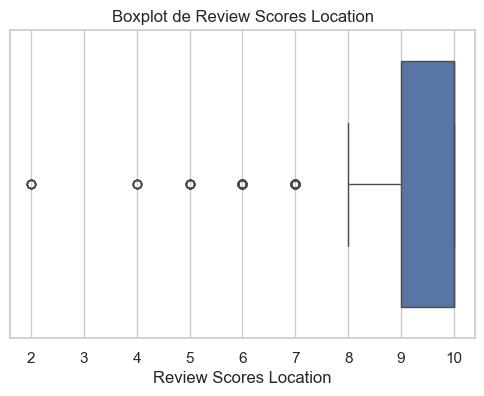

Distribución de Review Scores Location:
Review Scores Location
10.0    0.731394
9.0     0.201878
8.0     0.053366
7.0     0.006512
6.0     0.004990
5.0     0.000846
4.0     0.000507
2.0     0.000507
Name: proportion, dtype: float64




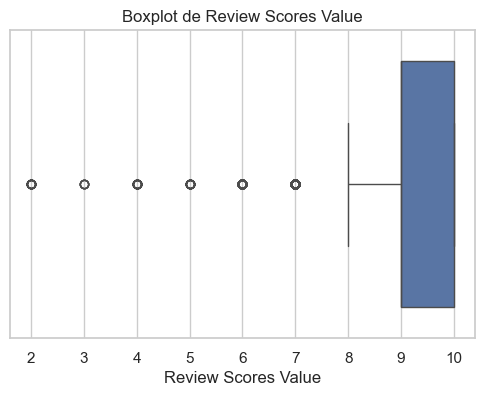

Distribución de Review Scores Value:
Review Scores Value
9.0     0.550068
10.0    0.336942
8.0     0.082544
7.0     0.014970
6.0     0.009219
4.0     0.002368
2.0     0.001776
5.0     0.001691
3.0     0.000423
Name: proportion, dtype: float64




In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de las gráficas
sns.set(style="whitegrid")

# Lista de variables numéricas
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Generar boxplots para cada variable numérica
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.show()
    
    # Distribución de valores en la variable numérica
    print(f"Distribución de {column}:")
    print(data[column].value_counts(normalize=True))
    print("\n")

Análisis Exploratorio de las variables numericas

-Accommodates:
He visto que a partir de 8 personas que se pueden alojar, el precio ya no presenta una gran variación. Esto indica que las propiedades que tienen una capacidad mayor a 8 huéspedes no afectan significativamente al precio.
Acción: Mantener solo las propiedades con capacidad de hasta 8 personas, eliminando las que tienen más de 8.

Número de Habitaciones
He observado que, a partir de 4 habitaciones, el precio sigue aumentando, pero no es tan relevante. Sin embargo, por el momento prefieres mantenerla, ya que puede tener alguna relación indirecta con el precio dependiendo de otros factores.
Acción: Mantener esta variable por ahora.

-Security Deposit y Cleaning Fee:
Ambas columnas no aportan valor relevante para predecir el precio. Además, estas variables no parecen tener una relación 
significativa.
Acción: Eliminar ambas columnas.

-Guest Included:
He notado que el número de huéspedes incluidos en el precio no tiene una relación clara con el precio, según los boxplots y las gráficas.
Acción: Eliminar esta columna.

-Extra People:
He observado que, a partir de 20 personas más, el precio no cambia mucho. Esto sugiere que no hay un aumento significativo en el precio más allá de ese punto.
Acción: Eliminar esta columna.

-Minimum y Maximum Nights:
Ambas columnas no parecen tener una relación fuerte con el precio, lo que indica que no son variables relevantes para la predicción.
Acción: Eliminar estas columnas.

-Availability (30, 60, 90, 365):
La disponibilidad en estos rangos no presenta outliers significativos, pero no parece tener una relación directa con el precio.
Acción: Eliminar estas columnas.

-Number of Reviews:
He decidido eliminar esta columna porque el número de reseñas es relativo y no siempre es preciso. Además, no parece tener una correlación clara con el precio.
Acción: Eliminar esta columna.

-Review Scores:
Después de un análisis detallado, puedes decidir que las puntuaciones de reseñas (como Review Scores Rating, Review Scores Accuracy, etc.) pueden no ser tan relevantes, ya que muchas veces están cerca de 10 y no varían significativamente.
Acción: Dependiendo de lo que prefieras, podrías eliminar estas columnas si no aportan valor.


In [107]:
# Verifico las columnas existentes en el DataFrame
print("Columnas existentes en el DataFrame:\n", numeric_columns)


Columnas existentes en el DataFrame:
 Index(['Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value'],
      dtype='object')


In [111]:
columns_to_drop = ['Security Deposit','Cleaning Fee','Extra People', 'Minimum Nights',
                   'Maximum Nights', 'Availability 30', 'Availability 60',
                   'Availability 90', 'Availability 365', 'Number of Reviews',
                   'Number of Reviews','Review Scores Rating', 'Review Scores Accuracy',
                   'Review Scores Cleanliness', 'Review Scores Checkin',
                   'Review Scores Communication', 'Review Scores Location',
                   'Review Scores Value']
data_limpio = data.drop(columns=columns_to_drop)
print("Columnas eliminadas por no ser necesarias:\n", columns_to_drop)

# Verificar el DataFrame limpio
data_limpio.head()

Columnas eliminadas por no ser necesarias:
 ['Security Deposit', 'Cleaning Fee', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 'Availability 365', 'Number of Reviews', 'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value']


Listing Url Last Scraped  \
0   https://www.airbnb.com/rooms/5994463   2017-04-08   
1  https://www.airbnb.com/rooms/14136180   2017-04-08   
2  https://www.airbnb.com/rooms/15520134   2017-04-08   
3   https://www.airbnb.com/rooms/8809721   2017-04-08   
4   https://www.airbnb.com/rooms/1162707   2017-04-08   

                                             Name  \
0                PISO ATOCHA- FLAT NEAR ATOCHA  .   
1                          The Palace Sol Madrid.   
2  por persona la noche metro linea5 vista alegre   
3             CITY CENTER JACINTO BENAVENTE ROOM4   
4              NICE & BIG DOUBLE ROOM AT DOWNTOWN   

                                             Summary  \
0  Piso recién reformado cómoda habitación con ba...   
1  Lugares de interés: Plaza Mayor, Plaza del Sol...   
2  我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...   
3  This stunning and amazig room is covered with ...   
4  Unique apartment in vibrant neighborhoods, car...   

                                               Space  \
0  Un piso muy cómodo en Jerónimos, una de las zo...   
1  El apartamento dispone de un dormitorio indepe...   
2  Los Apartamentos Good Stay Prado se encuentran...   
3  Los Apartamentos Good Stay Prado se encuentran...   
4  We are a young couple; David (Spain) and Ana (...   

                                         Description Experiences Offered  \
0  Piso recién reformado cómoda habitación con ba...                none   
1  Lugares de interés: Plaza Mayor, Plaza del Sol...                none   
2  我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...                none   
3  This stunning and amazig room is covered with ...                none   
4  We are a young couple; David (Spain) and Ana (...                none   

                               Neighborhood Overview  \
0  El barrio de Jeronimos es un enclave tranquilo...   
1  Situado en el corazón de Madrid, este apartame...   
2  Se trata de una de las zonas más emblemáticas ...   
3  Se trata de una de las zonas más emblemáticas ...   
4  Se trata de una de las zonas más emblemáticas ...   

                                               Notes  \
0  Facilitamos guía de eventos y rutas turísticas...   
1  Hora llegada: a partir de las 15:00 horas Hora...   
2  Apartamentos Temporales has over 100 apartment...   
3  Apartamentos Temporales has over 100 apartment...   
4  Apartamentos Temporales has over 100 apartment...   

                                             Transit  ... Weekly Price  \
0  Excelente ubicación a tan solo 5 minutos andan...  ...        550.0   
1  Acceso a todos los medios de trasporte, BUS, M...  ...        350.0   
2  羚羊Casa出发 --地铁Metro 5号线vsita alegre--opera转乘2号线...  ...        350.0   
3  It is calm, quite zone and you don’t have to s...  ...        350.0   
4  It is calm, quite zone and you don’t have to s...  ...        350.0   

  Monthly Price Guests Included Calendar Updated Calendar last Scraped  \
0        1250.0               1      2 weeks ago            2017-04-08   
1        1200.0               1            today            2017-04-08   
2        1200.0               1       a week ago            2017-04-08   
3        1200.0               1       3 days ago            2017-04-08   
4        1200.0               1       5 days ago            2017-04-08   

  First Review Last Review Cancellation Policy                   Geolocation  \
0   2015-04-26  2017-02-28            moderate  40.4077318793,-3.68481869733   
1   2016-08-05  2017-03-20            flexible  40.4158022422,-3.70534037765   
2   2017-02-26  2017-04-02            moderate  40.3890481626,-3.74037392557   
3   2017-02-26  2017-04-02              strict  40.4128140929,-3.70305247638   
4   2013-06-07  2017-02-28              strict  40.4386311984,-3.71371613279   

                                            Features  
0  Host Has Profile Pic,Is Location Exact,Require...  
1  Host Has Profile Pic,Host Identity Verified,Re...  
2  Host Has Profile Pic,Ho

In [113]:
data_limpio.shape

(11824, 59)

In [115]:
data_limpio.dtypes

Listing Url                             object
Last Scraped                    datetime64[ns]
Name                                    object
Summary                                 object
Space                                   object
Description                             object
Experiences Offered                     object
Neighborhood Overview                   object
Notes                                   object
Transit                                 object
Access                                  object
Interaction                             object
House Rules                             object
Thumbnail Url                           object
Medium Url                              object
Picture Url                             object
XL Picture Url                          object
Host URL                                object
Host Name                               object
Host Since                      datetime64[ns]
Host Location                           object
Host About   

In [117]:
#me quedo solo con las variables numericas
numeric_columns = data_limpio.select_dtypes(include=['float64', 'int64']).columns
numeric_data = data_limpio[numeric_columns]
print(numeric_data)

        Latitude  Longitude  Accommodates  Bathrooms  Bedrooms  Beds  Price  \
0      40.407732  -3.684819             4        1.0       1.0   2.0   60.0   
1      40.415802  -3.705340             4        1.0       1.0   2.0   50.0   
2      40.389048  -3.740374             1        1.5       1.0   8.0   10.0   
3      40.412814  -3.703052             2        3.0       1.0   1.0   30.0   
4      40.438631  -3.713716             2        1.0       1.0   1.0   32.0   
...          ...        ...           ...        ...       ...   ...    ...   
11819  40.430559  -3.717107             3        1.0       2.0   2.0   52.0   
11820  40.391126  -3.754068             6        1.0       3.0   3.0   55.0   
11821  40.416271  -3.713093             2        1.0       1.0   1.0   69.0   
11822  40.413397  -3.711280             2        1.0       1.0   1.0   69.0   
11823  40.431011  -3.677769             1        1.0       1.0   1.0   25.0   

       Weekly Price  Monthly Price  Guests Included

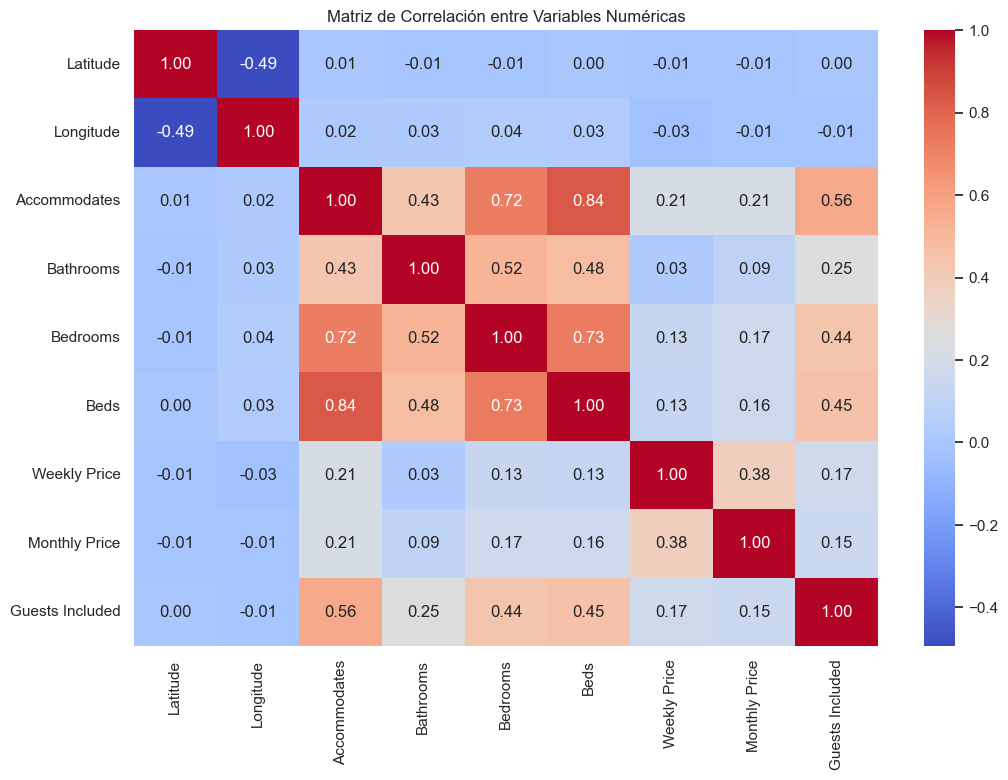

In [119]:
#hago la matriz de correlacion 
import seaborn as sns
import matplotlib.pyplot as plt

# Eliminar la columna 'Price' de las variables numéricas
numeric_data_sin_price = numeric_data.drop(columns=['Price'])

# Calcular la matriz de correlación
correlation_matrix = numeric_data_sin_price.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

In [121]:
#Creo que me ha quedado una matriz de correlacion bastante bien, porque no hay mucha relacion entre las variables,
#como mucho vamos al 0.84 de las accommodates pero en principio la vamos a dejer asi

In [123]:
# Correlación del 'Price' con las demás variables
price_corr = numeric_data.corr()['Price'].sort_values(ascending=False)

# Muestro las variables que tienen mas influencia con el precio
print(price_corr)

Price              1.000000
Accommodates       0.526160
Bedrooms           0.489470
Beds               0.435364
Bathrooms          0.375175
Guests Included    0.294605
Monthly Price      0.283953
Weekly Price       0.183926
Longitude          0.004841
Latitude          -0.013509
Name: Price, dtype: float64


In [125]:
#Análisis exploratorio de las variables categoricas
#identifico las variables categoricas

categorical_columns = data_limpio.select_dtypes(include=['object']).columns
print("Variables categóricas:\n", categorical_columns)


Variables categóricas:
 Index(['Listing Url', 'Name', 'Summary', 'Space', 'Description',
       'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit',
       'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url',
       'Picture Url', 'XL Picture Url', 'Host URL', 'Host Name',
       'Host Location', 'Host About', 'Host Response Time',
       'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood',
       'Host Verifications', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City',
       'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Property Type', 'Room Type', 'Bed Type', 'Amenities',
       'Calendar Updated', 'Calendar last Scraped', 'First Review',
       'Last Review', 'Cancellation Policy', 'Geolocation', 'Features'],
      dtype='object')


In [127]:
# Resumen estadístico de variables categóricas
print(data_limpio[categorical_columns].describe(include='object'))


                                 Listing Url  \
count                                  11824   
unique                                 11824   
top     https://www.airbnb.com/rooms/5994463   
freq                                       1   

                                      Name  \
count                                11824   
unique                               11523   
top     Apartamento en el centro de Madrid   
freq                                    13   

                                                  Summary  \
count                                               11824   
unique                                              10686   
top     Unique apartment in vibrant neighborhoods, car...   
freq                                                  522   

                                                    Space  \
count                                               11824   
unique                                               8200   
top     Los Apartamentos Good Stay Prad

In [129]:
# Ver la distribución de las variables categóricas
for col in categorical_columns:
    print(data_limpio[col].value_counts())
    print("-" * 40)

Listing Url
https://www.airbnb.com/rooms/5994463     1
https://www.airbnb.com/rooms/15266883    1
https://www.airbnb.com/rooms/15765215    1
https://www.airbnb.com/rooms/15782118    1
https://www.airbnb.com/rooms/7758336     1
                                        ..
https://www.airbnb.com/rooms/13608118    1
https://www.airbnb.com/rooms/5642057     1
https://www.airbnb.com/rooms/8916866     1
https://www.airbnb.com/rooms/12901132    1
https://www.airbnb.com/rooms/12275139    1
Name: count, Length: 11824, dtype: int64
----------------------------------------
Name
Apartamento en el centro de Madrid     13
Beautiful and bright room in Callao     7
Habitación en el centro de Madrid       7
Habitación en Madrid                    7
Residencia de estudiantes céntrica      7
                                       ..
FUN SLEEP VI                            1
Habitación en zona bien comunicada      1
Aprtm. nuevo junto al metro urgel       1
Habitación en Alberto Aguilera          1
CHEAP SI

#una vez visto la distribucion de las variables categoricas llego a esta conclusión

###Variables Categóricas a Eliminar

Listing URL:
Razón: Esta variable es única para cada listado y no aporta información relevante para predecir el precio.
Acción: Eliminar.

Name:
Razón: Los nombres de las propiedades son muy variados y no tienen una correlación clara con el precio.
Acción: Eliminar.

Summary:
Razón: Las descripciones son texto libre y no tienen una estructura que permita una codificación útil para el modelado.
Acción: Eliminar.

Experiences Offered:
Razón: La mayoría de los listados no ofrecen experiencias, y esta variable no parece tener una relación clara con el precio.
Acción: Eliminar.

Neighborhood Overview:
Razón: Similar a la descripción, es texto libre y no tiene una estructura útil para el modelado.
Acción: Eliminar.

Notes:
Razón: Son notas específicas para cada listado y no tienen una relación clara con el precio.
Acción: Eliminar.

Thumbnail Url, Medium Url, Picture Url, XL Picture Url:
Razón: Estas URLs son únicas para cada listado y no aportan información relevante para predecir el precio.
Acción: Eliminar.

Host URL, Host Name, Host Location, Host About, Host Response Time, Host Thumbnail Url, Host Picture Url:
Razón: Información específica del anfitrión que no tiene una relación clara con el precio de la propiedad.
Acción: Eliminar.

Host Verifications:
Razón: Las verificaciones del anfitrión no parecen tener una relación clara con el precio de la propiedad.
Acción: Eliminar.

Street, Zipcode:
Razón: La dirección exacta y el código postal son demasiado específicos y no aportan información relevante para predecir el precio.
Acción: Eliminar.

Neighbourhood, Neighbourhood Cleansed, Neighbourhood Group Cleansed:
Razón: La información del barrio ya está incluida en otras variables más relevantes como Neighbourhood Group Cleansed.
Acción: Eliminar Neighbourhood y Neighbourhood Cleansed, mantener Neighbourhood Group Cleansed.

City, State, Country, Country Code:
Razón: La mayoría de los listados están en Madrid, por lo que estas variables no aportan mucha variabilidad.
Acción: Eliminar.

Market, Smart Location:
Razón: Estas variables son redundantes con City y Neighbourhood Group Cleansed.
Acción: Eliminar.

First Review, Last Review, Calendar Updated, Calendar last Scraped:
Razón: Estas fechas no tienen una relación clara con el precio y no aportan información relevante para el modelado.
Acción: Eliminar.

Cancellation Policy:
Razón: Aunque puede tener alguna relevancia, la política de cancelación no parece tener una relación fuerte con el precio.
Acción: Eliminar.

Geolocation:
Razón: La geolocalización es redundante con Latitude y Longitude.
Acción: Eliminar.

Features:
Razón: Las características de los anfitriones no parecen tener una relación clara con el precio.
Acción: Eliminar.

###Variables Categóricas a Mantener

Property Type:
Razón: El tipo de propiedad puede tener una relación con el precio.
Acción: Mantener y codificar como variables dummy.

Room Type:
Razón: El tipo de habitación puede tener una relación con el precio.
Acción: Mantener y codificar como variables dummy.

Bed Type:
Razón: El tipo de cama puede tener una relación con el precio.
Acción: Mantener y codificar como variables dummy.

Amenities:
Razón: Las comodidades pueden tener una relación con el precio.
Acción: Mantener y codificar las comodidades más comunes como variables dummy.

Neighbourhood Group Cleansed:
Razón: El grupo de barrio limpio puede tener una relación con el precio.
Acción: Mantener y codificar como variables dummy.

In [133]:
import pandas as pd

# Verificar columnas existentes en el DataFrame
print("Columnas existentes en el DataFrame:\n", data_limpio.columns)

# Identifico variables categóricas
categorical_columns = data_limpio.select_dtypes(include=['object']).columns
print("Variables categóricas:\n", categorical_columns)

# Lista de variables categóricas a codificar
categorical_columns_to_encode = ['Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Neighbourhood Group Cleansed']

# Ajusto la lista de columnas a codificar según las columnas existentes
categorical_columns_to_encode = [col for col in categorical_columns_to_encode if col in data_limpio.columns]
print("Columnas a codificar:\n", categorical_columns_to_encode)

# Aplico target encoding
for col in categorical_columns_to_encode:
    mean_target = data_limpio.groupby(col)['Price'].mean()
    data_limpio[col + '_encoded'] = data_limpio[col].map(mean_target)

# Verifico que las variables categóricas relevantes han sido codificadas correctamente
print("Variables categóricas después de aplicar target encoding:\n", data_limpio.columns)
print(data_limpio.dtypes)

# Elimino columnas categóricas no relevantes
columns_to_drop = [col for col in categorical_columns if col not in categorical_columns_to_encode]
data_limpio = data_limpio.drop(columns=columns_to_drop)

# Verifico que las columnas categóricas no relevantes han sido eliminadas
print("Columnas después de eliminar las no relevantes:\n", data_limpio.columns)
print(data_limpio.dtypes)


Columnas existentes en el DataFrame:
 Index(['Listing Url', 'Last Scraped', 'Name', 'Summary', 'Space',
       'Description', 'Experiences Offered', 'Neighborhood Overview', 'Notes',
       'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url',
       'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Name',
       'Host Since', 'Host Location', 'Host About', 'Host Response Time',
       'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood',
       'Host Verifications', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City',
       'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type',
       'Amenities', 'Price', 'Weekly Price', 'Monthly Price',
       'Guests Included', 'Calendar Updated', 'Calendar last Scraped',
       'First Review', 'Last Review', 'Cance

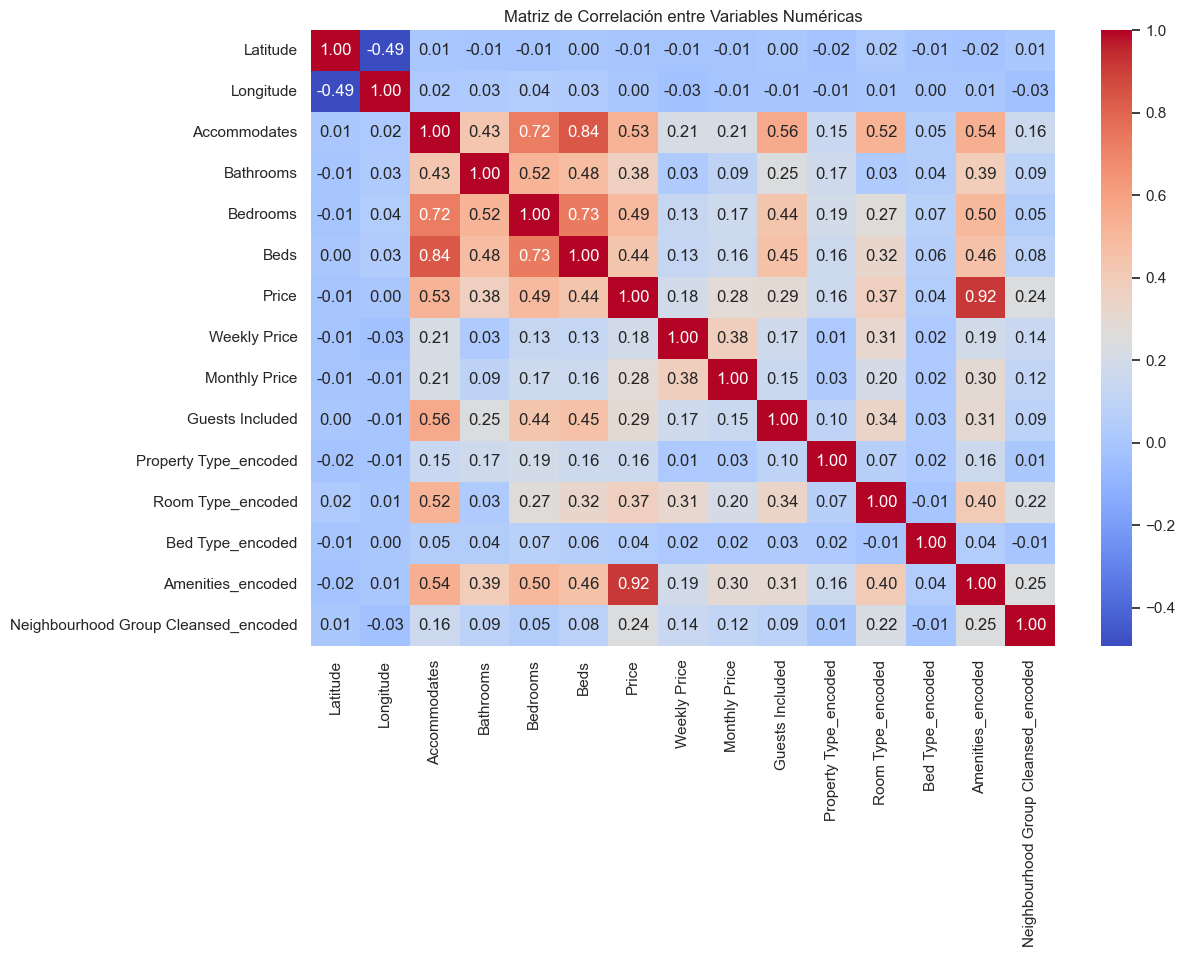

In [135]:
#volvemos hacer la matriz de correlacion con nuestras nuevas vatiables numericas
# Seleccionar variables numéricas
numeric_columns = data_limpio.select_dtypes(include=['float64', 'int64']).columns
numeric_data = data_limpio[numeric_columns]

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

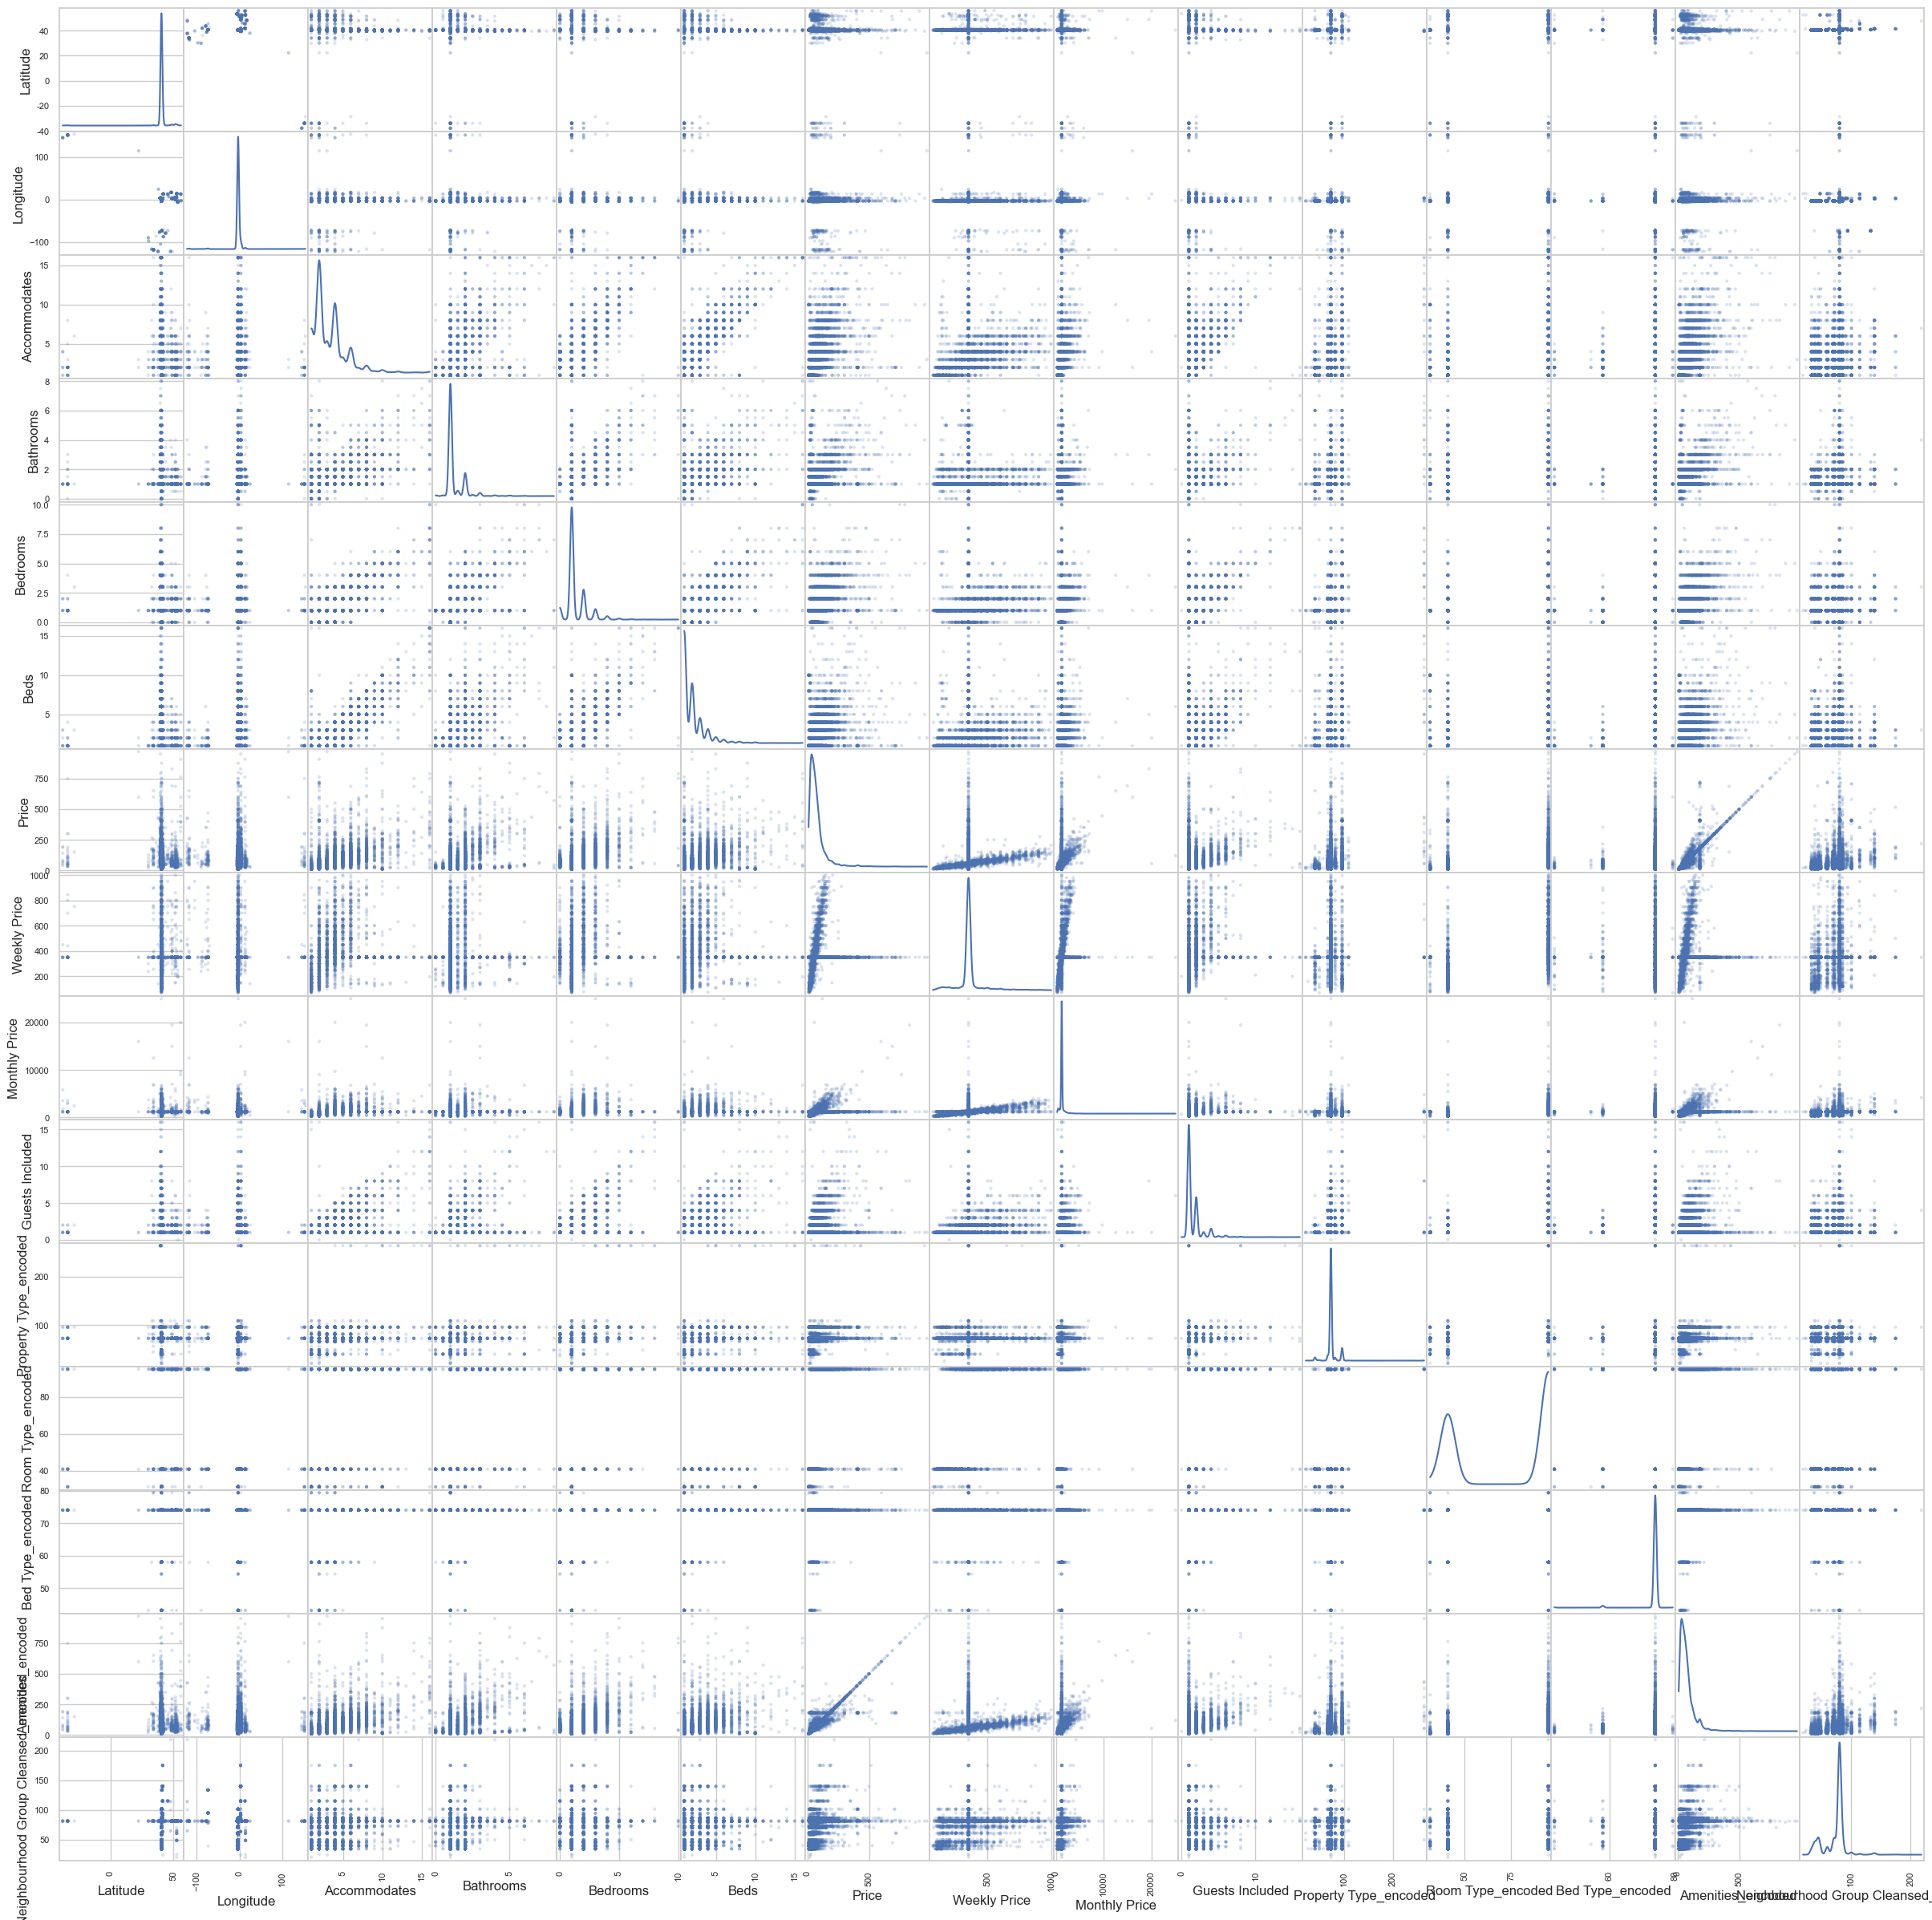

In [192]:
import pandas as pd
import matplotlib.pyplot as plt

# Seleccionar variables numéricas
numeric_columns = data_limpio.select_dtypes(include=['float64', 'int64']).columns
numeric_data = data_limpio[numeric_columns]

# Generar la matriz de dispersión
pd.plotting.scatter_matrix(numeric_data, alpha=0.2, figsize=(30, 30), diagonal='kde')

# Mostrar la matriz de dispersión
plt.show()

In [202]:
#Aplico al data de test lo mismo que al de train

In [204]:
# Verifico las columnas existentes en el DataFrame de test
print("Columnas existentes en el DataFrame de prueba:\n", test_data.columns)

Columnas existentes en el DataFrame de prueba:
 Index(['Last Scraped', 'Host Since', 'Neighbourhood Group Cleansed',
       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Price',
       'Weekly Price', 'Monthly Price', 'Guests Included',
       'Property Type_encoded', 'Room Type_encoded', 'Bed Type_encoded',
       'Amenities_encoded', 'Neighbourhood Group Cleansed_encoded'],
      dtype='object')


In [206]:
# Identifico variables categóricas en el conjunto de test
categorical_columns_test = test_data.select_dtypes(include=['object']).columns
print("Variables categóricas en el conjunto de prueba:\n", categorical_columns_test)

Variables categóricas en el conjunto de prueba:
 Index(['Neighbourhood Group Cleansed', 'Property Type', 'Room Type',
       'Bed Type', 'Amenities'],
      dtype='object')


In [208]:
# Lista de variables categóricas a codificar en el conjunto de de test
categorical_columns_to_encode_test = ['Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Neighbourhood Group Cleansed']


In [210]:
# Ajusto la lista de columnas a codificar según las columnas existentes en el conjunto de test
categorical_columns_to_encode_test = [col for col in categorical_columns_to_encode_test if col in test_data.columns]
print("Columnas a codificar en el conjunto de prueba:\n", categorical_columns_to_encode_test)


Columnas a codificar en el conjunto de prueba:
 ['Property Type', 'Room Type', 'Bed Type', 'Amenities', 'Neighbourhood Group Cleansed']


In [212]:
# Aplico target encoding en el conjunto de test
for col in categorical_columns_to_encode_test:
    mean_target = data_limpio.groupby(col)['Price'].mean()  # Usamos el DataFrame de entrenamiento para calcular la media
    test_data[col + '_encoded'] = test_data[col].map(mean_target)

In [214]:
# Verifico que las variables categóricas relevantes han sido codificadas correctamente en el conjunto de test
print("Variables categóricas después de aplicar target encoding en el conjunto de prueba:\n", test_data.columns)
print(test_data.dtypes)

Variables categóricas después de aplicar target encoding en el conjunto de prueba:
 Index(['Last Scraped', 'Host Since', 'Neighbourhood Group Cleansed',
       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Price',
       'Weekly Price', 'Monthly Price', 'Guests Included',
       'Property Type_encoded', 'Room Type_encoded', 'Bed Type_encoded',
       'Amenities_encoded', 'Neighbourhood Group Cleansed_encoded'],
      dtype='object')
Last Scraped                            datetime64[ns]
Host Since                              datetime64[ns]
Neighbourhood Group Cleansed                    object
Latitude                                       float64
Longitude                                      float64
Property Type                                   object
Room Type                                       object
Accommodates                                     int64
Bathrooms                       

In [218]:
# Elimino columnas categóricas no relevantes en el conjunto de test
columns_to_drop_test = [col for col in categorical_columns_test if col not in categorical_columns_to_encode_test]
test_data = test_data.drop(columns=columns_to_drop_test)


In [220]:
# Verifico que las columnas categóricas no relevantes han sido eliminadas en el conjunto de test
print("Columnas después de eliminar las no relevantes en el conjunto de prueba:\n", test_data.columns)
print(test_data.dtypes)

Columnas después de eliminar las no relevantes en el conjunto de prueba:
 Index(['Last Scraped', 'Host Since', 'Neighbourhood Group Cleansed',
       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Price',
       'Weekly Price', 'Monthly Price', 'Guests Included',
       'Property Type_encoded', 'Room Type_encoded', 'Bed Type_encoded',
       'Amenities_encoded', 'Neighbourhood Group Cleansed_encoded'],
      dtype='object')
Last Scraped                            datetime64[ns]
Host Since                              datetime64[ns]
Neighbourhood Group Cleansed                    object
Latitude                                       float64
Longitude                                      float64
Property Type                                   object
Room Type                                       object
Accommodates                                     int64
Bathrooms                                 

In [222]:
# Selecciono las características y la variable objetivo en el conjunto de entrenamiento
features_train = data_limpio.select_dtypes(include=['float64', 'int64']).drop(columns=['Price'])
target_train = data_limpio['Price']

# Selecciono las características y la variable objetivo en el conjunto de prueba
features_test = test_data.select_dtypes(include=['float64', 'int64']).drop(columns=['Price'])
target_test = test_data['Price']

In [224]:
# Verifico las columnas en el conjunto de entrenamiento
print("Columnas en el conjunto de entrenamiento:\n", data_limpio.columns)

# Verificar las columnas en el conjunto de test
print("Columnas en el conjunto de prueba:\n", test_data.columns)

Columnas en el conjunto de entrenamiento:
 Index(['Last Scraped', 'Host Since', 'Neighbourhood Group Cleansed',
       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Price',
       'Weekly Price', 'Monthly Price', 'Guests Included',
       'Property Type_encoded', 'Room Type_encoded', 'Bed Type_encoded',
       'Amenities_encoded', 'Neighbourhood Group Cleansed_encoded'],
      dtype='object')
Columnas en el conjunto de prueba:
 Index(['Last Scraped', 'Host Since', 'Neighbourhood Group Cleansed',
       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Price',
       'Weekly Price', 'Monthly Price', 'Guests Included',
       'Property Type_encoded', 'Room Type_encoded', 'Bed Type_encoded',
       'Amenities_encoded', 'Neighbourhood Group Cleansed_encoded'],
      dtype='object')


In [226]:
# Obtengo las columnas comunes entre el conjunto de entrenamiento y el conjunto de test
common_columns = data_limpio.columns.intersection(test_data.columns)

# Selecciono solo las columnas comunes en ambos conjuntos de datos
data_limpio = data_limpio[common_columns]
test_data = test_data[common_columns]

# Verificar las columnas en ambos conjuntos de datos después de la selección
print("Columnas en el conjunto de entrenamiento después de la selección:\n", data_limpio.columns)
print("Columnas en el conjunto de prueba después de la selección:\n", test_data.columns)

Columnas en el conjunto de entrenamiento después de la selección:
 Index(['Last Scraped', 'Host Since', 'Neighbourhood Group Cleansed',
       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Price',
       'Weekly Price', 'Monthly Price', 'Guests Included',
       'Property Type_encoded', 'Room Type_encoded', 'Bed Type_encoded',
       'Amenities_encoded', 'Neighbourhood Group Cleansed_encoded'],
      dtype='object')
Columnas en el conjunto de prueba después de la selección:
 Index(['Last Scraped', 'Host Since', 'Neighbourhood Group Cleansed',
       'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Price',
       'Weekly Price', 'Monthly Price', 'Guests Included',
       'Property Type_encoded', 'Room Type_encoded', 'Bed Type_encoded',
       'Amenities_encoded', 'Neighbourhood Group Cleansed_encoded'],
      d

In [228]:
# Seleccion0 solo las columnas numéricas en el conjunto de entrenamiento
numeric_columns_train = data_limpio.select_dtypes(include=['float64', 'int64']).columns
features_train = data_limpio[numeric_columns_train].drop(columns=['Price'])
target_train = data_limpio['Price']

# Selecciono solo las columnas numéricas en el conjunto de test
numeric_columns_test = test_data.select_dtypes(include=['float64', 'int64']).columns
features_test = test_data[numeric_columns_test].drop(columns=['Price'])
target_test = test_data['Price']

In [230]:
from sklearn.preprocessing import StandardScaler

# Escalar las características del conjunto de entrenamiento
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)

# Escalar las características del conjunto de prueba
features_test_scaled = scaler.transform(features_test)

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [243]:
# Defino el vector de alphas
alpha_vector = np.logspace(-1, 10, 20)

# Defino los hiperparámetros a probar
param_grid = {'alpha': alpha_vector}

In [245]:
# Realizo la búsqueda de hiperparámetros utilizando GridSearchCV
grid = GridSearchCV(Lasso(), scoring='neg_mean_squared_error', param_grid=param_grid, cv=3, verbose=2)
grid.fit(features_train_scaled, target_train)

# Imprimo el mejor score y los mejores hiperparámetros
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END .............................alpha=5.45559478116852; total time=   0.0s
[CV] END .............................alpha=5.45559478116852; total time=   0.0s
[CV] END .............................alpha=5.45

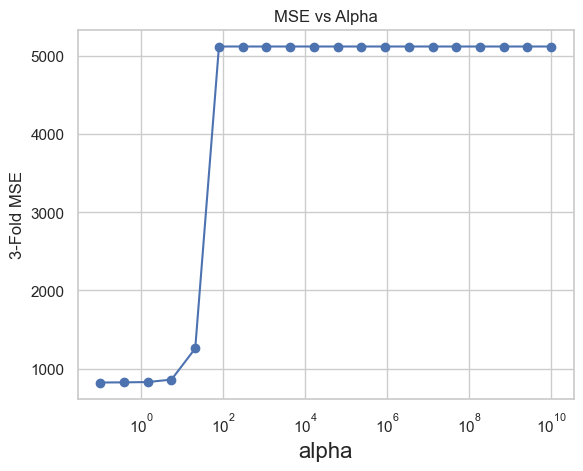

In [278]:
# Obtener los scores de validación cruzada
scores = -1 * np.array(grid.cv_results_['mean_test_score'])

# Visualizar los resultados
plt.semilogx(alpha_vector, scores, '-o')
plt.xlabel('alpha', fontsize=16)
plt.ylabel('3-Fold MSE')
plt.title('MSE vs Alpha')
plt.show()

El resultado de la validación cruzada muestra que el mejor puntaje promedio de validación cruzada es -821.61, lo que sugiere que el modelo tiene un buen desempeño en general, pero con un error significativo (el signo negativo indica que el modelo está minimizando la métrica objetivo, que en este caso podría ser MSE o alguna variante). El mejor parámetro encontrado es alpha = 0.1, lo que indica que una regularización moderada mejora el desempeño del modelo. Sin embargo, la diferencia entre los puntajes en el entrenamiento y la validación sugiere que se podrían explorar mejoras en la generalización del modelo.

In [280]:
# Obtener el mejor hiperparámetro
alpha_optimo = grid.best_params_['alpha']

In [282]:
# Entrenar el modelo Lasso con el mejor hiperparámetro
lasso = Lasso(alpha=alpha_optimo).fit(features_train_scaled, target_train)


In [284]:
# Hacer predicciones en el conjunto de entrenamiento
ytrainLasso = lasso.predict(features_train_scaled)


In [286]:
# Verifico si hay valores faltantes en los datos de test
print("Valores faltantes en el conjunto de prueba:\n", features_test.isnull().sum())

Valores faltantes en el conjunto de prueba:
 Latitude                                   0
Longitude                                  0
Accommodates                               0
Bathrooms                                  0
Bedrooms                                   0
Beds                                       0
Weekly Price                               0
Monthly Price                              0
Guests Included                            0
Property Type_encoded                      1
Room Type_encoded                          0
Bed Type_encoded                           0
Amenities_encoded                       2335
Neighbourhood Group Cleansed_encoded       2
dtype: int64


In [288]:
#Uso SimplerImputer para imputar los valores faltantes con la mediana de cada columna 
from sklearn.impute import SimpleImputer

# Creo un imputador para manejar los valores faltantes
imputer = SimpleImputer(strategy='median')

# Imputo los valores faltantes en el conjunto de test
features_test_imputed = imputer.fit_transform(features_test)

# Convierto los datos de test en un DataFrame de pandas después de la imputación
features_test_imputed_df = pd.DataFrame(features_test_imputed, columns=features_test.columns)                                              

# Escalo las características del conjunto de test después de la imputación
features_test_scaled = scaler.transform(features_test_imputed_df)

In [290]:
# Hacer predicciones en el conjunto de test
ytestLasso = lasso.predict(features_test_scaled)

In [292]:
# Evaluo el modelo en el conjunto de entrenamiento y test
mseTrainModelLasso = mean_squared_error(target_train, ytrainLasso)
mseTestModelLasso = mean_squared_error(target_test, ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

MSE Modelo Lasso (train): 814
MSE Modelo Lasso (test) : 4.88e+03
RMSE Modelo Lasso (train): 28.5
RMSE Modelo Lasso (test) : 69.8


In [294]:
# Obtener los nombres de las características
feature_names = features_train.columns

# Obtener los coeficientes del modelo
w = lasso.coef_

# Imprimo los coeficientes del modelo
for f, wi in zip(feature_names, w):
    print(f, wi)

Latitude 0.27020624082950434
Longitude -0.0
Accommodates 2.987845803028366
Bathrooms 0.4573122561190524
Bedrooms 2.47539071689469
Beds -2.0188421241841
Weekly Price 0.47415457412207834
Monthly Price 0.6015911968056522
Guests Included -0.04435410061480448
Property Type_encoded 0.3927959276907518
Room Type_encoded -0.9860781411235594
Bed Type_encoded -0.0
Amenities_encoded 63.05780525424593
Neighbourhood Group Cleansed_encoded 1.4282113191027332


El modelo Lasso presenta un buen ajuste en el conjunto de entrenamiento (MSE de 814 y RMSE de 28.5), pero no generaliza bien al conjunto de prueba (MSE de 4880 y RMSE de 69.8), lo que indica overfitting. Los coeficientes del modelo muestran que características como el número de personas que puede acomodar, el número de habitaciones y las amenidades tienen un impacto positivo en el precio, mientras que el número de camas tiene un coeficiente negativo. Se sugiere explorar técnicas para reducir el overfitting, como la regularización adicional o el uso de otros modelos.